#0.install package

In [ ]:
# Install dependencies as needed
!pip install kagglehub[pandas-datasets]

# Ensure scikit-learn is up to date
!pip install --upgrade scikit-learn

#for map ploting
!pip install geopandas matplotlib

#For Interactive notebook
!pip install ipywidgets

!pip install -U gdown



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00


#1.Clustering Bachelor Master Phd using kmeans

In [ ]:
# --- Import necessary libraries ---

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Downloading datasets (Kaggle)
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Geospatial data processing
import geopandas as gpd

# System and file operations
import os
import urllib.request
import zipfile

###1.0 Dowload dataset

In [ ]:
import gdown

file_id = "15Cekk3yQuPbfRv27S5fm9NRSpTM4oBvD"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=15Cekk3yQuPbfRv27S5fm9NRSpTM4oBvD
To: /content/International_Education_Costs.csv
100%|██████████| 84.1k/84.1k [00:00<00:00, 58.6MB/s]


'International_Education_Costs.csv'

In [ ]:
# --- Data Loading ---
# Set the path to the CSV file within the Kaggle dataset
file_path = "International_Education_Costs.csv"

# Load the dataset using kagglehub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "adilshamim8/cost-of-international-education",
    file_path
)

# Display the first 5 rows of the DataFrame to verify successful loading
print("First 5 records:\n", df.head())

<ipython-input-5-520aa3e7234e>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:
      Country       City                      University  \
0        USA  Cambridge              Harvard University   
1         UK     London         Imperial College London   
2     Canada    Toronto           University of Toronto   
3  Australia  Melbourne         University of Melbourne   
4    Germany     Munich  Technical University of Munich   

                  Program   Level  Duration_Years  Tuition_USD  \
0        Computer Science  Master             2.0        55400   
1            Data Science  Master             1.0        41200   
2      Business Analytics  Master             2.0        38500   
3             Engineering  Master             2.0        42000   
4  Mechanical Engineering  Master             2.0          500   

   Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
0               83.5      2200           160           1500           1.00  
1               75.8      1800           485            800           0.79  

###1.1 Clean  Dataset

In [ ]:
class DataCleaner:
    def __init__(self, df):
        self.df = df
        self.cleaned_df = None

    def handle_missing_values(self):
        """Handles missing values by dropping rows with any missing values."""
        if self.cleaned_df is None:
            self.cleaned_df = self.df
        self.cleaned_df = self.cleaned_df.dropna()
        return self

    def remove_zero_tuition(self):
        """Removes rows where 'Tuition_USD' is 0."""
        if self.cleaned_df is None:
            self.cleaned_df = self.df
        self.cleaned_df = self.cleaned_df[self.cleaned_df['Tuition_USD'] != 0]
        return self

    def calculate_total_cost(self):
        """
        Calculates the total estimated cost and adds it as a new column.
        Total Cost = Tuition_USD + (Rent_USD * Duration_Years * 12) + Visa_Fee_USD + (Insurance_USD * Duration_Years)
        """
        if self.cleaned_df is None:
            self.cleaned_df = self.df

        # Ensure necessary columns exist before calculating
        required_columns = ['Tuition_USD', 'Rent_USD', 'Duration_Years', 'Visa_Fee_USD', 'Insurance_USD']
        if not all(col in self.cleaned_df.columns for col in required_columns):
            print("Error: Missing required columns for total cost calculation.")
            return self

        self.cleaned_df['Total_Estimated_Cost'] = (
            self.cleaned_df['Tuition_USD'] +
            (self.cleaned_df['Rent_USD'] * self.cleaned_df['Duration_Years'] * 12) +
            self.cleaned_df['Visa_Fee_USD'] +
            (self.cleaned_df['Insurance_USD'] * self.cleaned_df['Duration_Years'])
        )
        return self

    def filter_by_level(self, levels):
        """
        Filters the DataFrame to include only specified levels.

        Args:
            levels (list): A list of strings representing the levels to keep (e.g., ['Master', 'PhD']).
        """
        if self.cleaned_df is None:
            self.cleaned_df = self.df
        if 'Level' in self.cleaned_df.columns:
            self.cleaned_df = self.cleaned_df[self.cleaned_df['Level'].isin(levels)].reset_index(drop=True)
        else:
            print("Warning: 'Level' column not found in the DataFrame. Skipping filtering by level.")
        return self

    def build(self):
        """Returns the cleaned DataFrame."""
        if self.cleaned_df is None:
            self.cleaned_df = self.df
        return self.cleaned_df

def Display_Full_Table_Data(data):
    """
    Displays the entire DataFrame as a table.
    Sets display options to show all rows and columns.
    """
    if data is None:
        print("No cleaned data available yet.")
        return

    # Temporarily set pandas options to display all rows and columns
    original_max_rows = pd.get_option('display.max_rows')
    original_max_columns = pd.get_option('display.max_columns')
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    print("\n--- Displaying Cleaned Data ---")
    display(data)
    print("-----------------------------")

    # Reset pandas options to their original values
    pd.set_option('display.max_rows', original_max_rows)
    pd.set_option('display.max_columns', original_max_columns)


# Build data that already cleaned, including the new calculation:
data_cleaner = DataCleaner(df)
df_cleaned = data_cleaner.handle_missing_values().remove_zero_tuition().calculate_total_cost().build()
Display_Full_Table_Data(df_cleaned)



--- Displaying Cleaned Data ---


Country               City  \
0                   USA          Cambridge   
1                    UK             London   
2                Canada            Toronto   
3             Australia          Melbourne   
4               Germany             Munich   
5                 Japan              Tokyo   
6           Netherlands          Amsterdam   
7             Singapore          Singapore   
8                France              Paris   
9           Switzerland             Zurich   
12                China            Beijing   
13          South Korea              Seoul   
14              Ireland             Dublin   
15          South Korea              Busan   
16          New Zealand           Auckland   
17              Austria             Vienna   
18              Belgium           Brussels   
19                  USA          Ann Arbor   
20                  USA            Atlanta   
21                  USA             Austin   
22                   UK            Bristol   
23               Canada             Ottawa   
24            Hong Kong          Hong Kong   
25             Portugal             Lisbon   
26               Israel           Tel Aviv   
27               Taiwan             Taipei   
28       Czech Republic             Prague   
29                  USA           Stanford   
30                  USA             Boston   
31                   UK             Oxford   
32                   UK          Cambridge   
33              Germany         Heidelberg   
34          Switzerland              Basel   
35          Netherlands              Delft   
36            Singapore          Singapore   
37               Canada           Waterloo   
38            Australia           Canberra   
40                  USA          San Diego   
41                  USA            Seattle   
42               Canada           Edmonton   
43                   UK            Glasgow   
44                India          Bangalore   
46               Poland             Warsaw   
47              Ireland             Galway   
48          South Korea            Daejeon   
49             Malaysia       Kuala Lumpur   
50                  USA           Berkeley   
51                   UK         Manchester   
52               Canada          Vancouver   
53            Australia             Sydney   
55                Spain          Barcelona   
56                Italy              Milan   
57          Netherlands          Rotterdam   
60                Japan              Osaka   
61                Japan              Kyoto   
62                Japan             Nagoya   
63                Japan             Sendai   
64                Japan            Fukuoka   
65                Japan            Sapporo   
66                Japan              Tokyo   
67                Japan            Tsukuba   
68                Japan               Kobe   
69                Japan           Kanazawa   
70                Japan          Hiroshima   
71            Australia           Adelaide   
72            Australia              Perth   
73            Australia         Gold Coast   
74            Australia             Hobart   
75            Australia          Newcastle   
76            Australia         Wollongong   
77            Australia             Darwin   
78            Australia         Townsville   
79            Australia     Sunshine Coast   
80            Australia           Armidale   
81              Germany            Dresden   
82              Germany          Stuttgart   
83              Germany            Hamburg   
84              Germany             Aachen   
85              Germany          Karlsruhe   
86              Germany          Darmstadt   
87              Germany       Braunschweig   
88              Germany               Jena   
89              Germany           Hannover   
90              Germany           Freiburg   
91                  USA       Philadelphia   
92                  USA            Chicago   
93            

-----------------------------


In [ ]:
print(df_cleaned.columns.to_list())

['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate', 'Total_Estimated_Cost']


###1.2 Selection  Dataset

In [ ]:
class FeatureSelector:
    def __init__(self, numerical_features, categorical_features):
        self.numerical_features = numerical_features
        self.categorical_features = categorical_features

    def select_features(self, df):
        """
        Selects and preprocesses features for clustering.

        Args:
            df: The input pandas DataFrame.

        Returns:
            available_numerical_features: List of available numerical features.
            available_categorical_features: List of available categorical features.
        """

        # Identify available numerical and categorical columns in the data
        available_numerical_features = [col for col in self.numerical_features if col in df.columns]
        available_categorical_features = [col for col in self.categorical_features if col in df.columns]

        # Handle cases where specified features are not found
        if not available_numerical_features:
            print("\nError: No specified numerical features found in the dataset.")
            print("Please check the 'numerical_features' list and ensure it matches your CSV columns.")
            exit()

        # Print information about selected features to give feedback to user
        print(f"\nUsing numerical features for clustering: {available_numerical_features}")
        if available_categorical_features:
            print(f"Using categorical features for clustering: {available_categorical_features}")
        else:
            print("No specified categorical features found or used for clustering.")

        return available_numerical_features, available_categorical_features


# --- Feature Selection and Preprocessing ---
# Define the desired features
# no need to include cat feature in the unsupervise leaning for this case
numerical_features = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']
categorical_features = []

# Create a FeatureSelector object
feature_selector = FeatureSelector(numerical_features, categorical_features)

# Select and preprocess features
available_numerical_features, available_categorical_features = feature_selector.select_features(df_cleaned)



Using numerical features for clustering: ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']
No specified categorical features found or used for clustering.


###1.3 Preprocess data before clustering

In [ ]:
class DataPreprocessor:
    """
    A class to preprocess data for machine learning.

    Handles numerical and categorical features using StandardScaler and OneHotEncoder.
    """

    def __init__(self, numerical_features, categorical_features):
        """
        Initializes the DataPreprocessor with numerical and categorical features.

        Args:
            numerical_features: List of numerical feature names.
            categorical_features: List of categorical feature names.
        """
        self.numerical_features = numerical_features
        self.categorical_features = categorical_features
        self.preprocessor = self._build_preprocessor()

    def _build_preprocessor(self):
        """
        Builds the ColumnTransformer for preprocessing.

        Returns:
            ColumnTransformer: The preprocessor object.
        """
        numerical_transformer = StandardScaler()
        categorical_transformer = OneHotEncoder(handle_unknown='ignore')

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, self.numerical_features),
                ('cat', categorical_transformer, self.categorical_features)
            ])

        return preprocessor

    def fit_transform(self, X):
        """
        Fits the preprocessor to the data and transforms it.

        Args:
            X: The input data (pandas DataFrame).

        Returns:
            numpy.ndarray: The preprocessed data.
        """
        return self.preprocessor.fit_transform(X)

    def transform(self, X):
        """
        Transforms the data using the fitted preprocessor.

        Args:
            X: The input data (pandas DataFrame).

        Returns:
            numpy.ndarray: The preprocessed data.
        """
        return self.preprocessor.transform(X)


# Instantiate the DataPreprocessor
preprocessor = DataPreprocessor(numerical_features, categorical_features)

# Fit and transform the data using the fit_transform() method
# Apply the transform method to new data for consistency.
preprocessed_data = preprocessor.fit_transform(df_cleaned)

print("Shape of df_cleaned:", df_cleaned.shape)
print("Shape of preprocessed_data:", preprocessed_data.shape)




Shape of df_cleaned: (804, 13)
Shape of preprocessed_data: (804, 5)


###1.4 Cheack elbowMethod

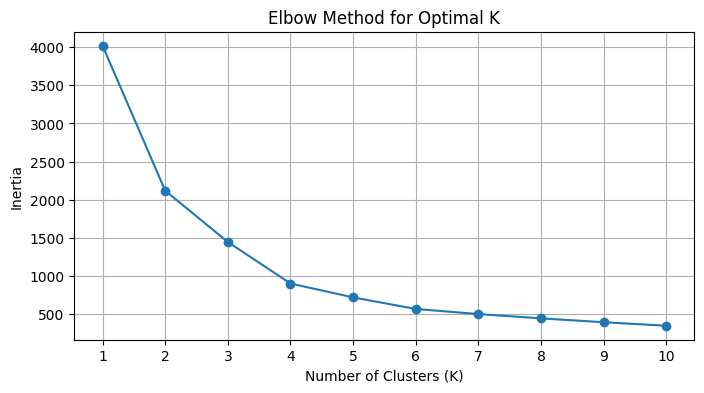

In [ ]:
# --- ElbowMethod Class Definition (Corrected) ---
class ElbowMethod:
    """
    A class to determine the optimal number of clusters using the Elbow Method.
    """

    def __init__(self, k_range=(1, 10), random_state=42, n_init=10):
        """
        Initializes the ElbowMethod with K range and other parameters.

        Args:
            k_range: Tuple specifying the range of K values to test (default: (1, 10)).
            random_state: Random seed for KMeans (default: 42).
            n_init: Number of times KMeans is run with different centroid seeds (default: 10).
        """
        # The ElbowMethod itself doesn't need to store the preprocessor object
        # It operates on already preprocessed data
        self.k_range = k_range
        self.random_state = random_state
        self.n_init = n_init

    def find_optimal_k(self, preprocessed_data):
        """
        Finds the optimal number of clusters using the Elbow Method.

        Args:
            preprocessed_data: The input data (numpy.ndarray) which has already been preprocessed.

        Returns:
            None: Plots the Elbow Method graph.
        """

        inertia = []
        # Loop through the range of K values
        for k in range(self.k_range[0], self.k_range[1] + 1):

            # Instantiate KMeans with the current number of clusters
            kmeans = KMeans(n_clusters=k, random_state=self.random_state, n_init=self.n_init)

            # Fit KMeans directly to the preprocessed data
            kmeans.fit(preprocessed_data)

            # Append the inertia (within-cluster sum of squares) to the list
            inertia.append(kmeans.inertia_)

        # Plot the Elbow Method graph
        plt.figure(figsize=(8, 4))
        plt.plot(range(self.k_range[0], self.k_range[1] + 1), inertia, marker='o')
        plt.title('Elbow Method for Optimal K')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Inertia')
        plt.xticks(range(self.k_range[0], self.k_range[1] + 1))
        plt.grid(True)
        plt.show()


elbow_method = ElbowMethod()
elbow_method.find_optimal_k(preprocessed_data)

###1.5 clustering with input k

Enter the desired number of clusters: 6


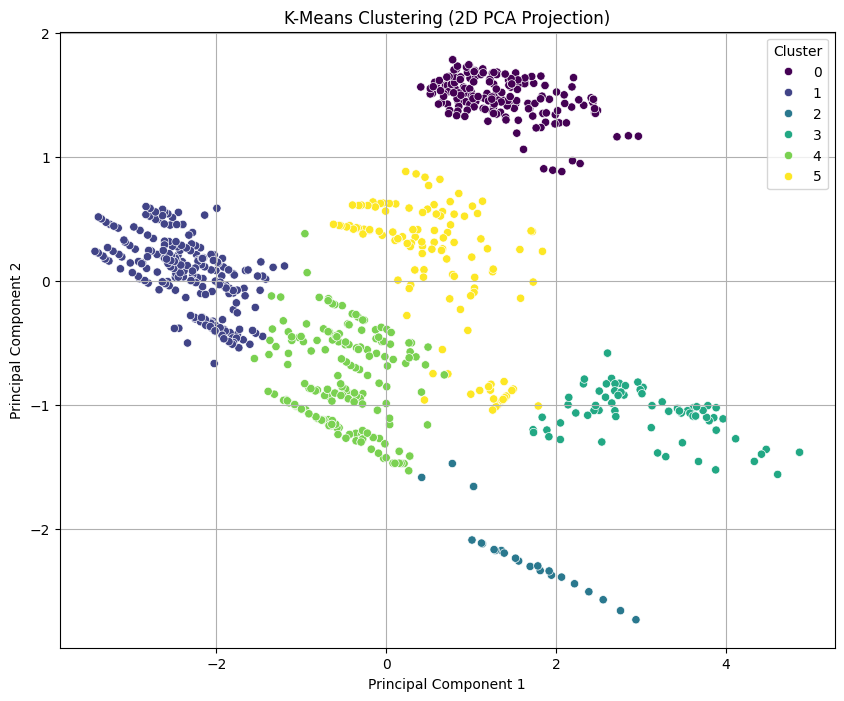


Analyzing the characteristics of each cluster:
          Tuition_USD  Living_Cost_Index     Rent_USD  Visa_Fee_USD  \
Cluster                                                               
0        32392.737430          69.465363  1286.033520    469.581006   
1         4660.185185          44.981481   370.231481    109.722222   
2         1979.166667          95.404167  1683.333333    106.833333   
3        47742.307692          77.796154  1858.974359    160.000000   
4         5920.789474          69.690526   843.631579    130.494737   
5        29488.888889          67.523932  1184.615385    217.384615   

         Insurance_USD  
Cluster                 
0           727.932961  
1           341.898148  
2          1137.500000  
3          1500.000000  
4           713.947368  
5           698.461538  

Data points in Cluster 0 (sorted by Country):


Country            City                           University  \
344  Australia        Brisbane             University of Queensland   
335  Australia       Melbourne              University of Melbourne   
334  Australia       Melbourne              University of Melbourne   
367  Australia      Wollongong             University of Wollongong   
368  Australia      Wollongong             University of Wollongong   
369  Australia      Wollongong             University of Wollongong   
370  Australia       Newcastle              University of Newcastle   
371  Australia       Newcastle              University of Newcastle   
372  Australia       Newcastle              University of Newcastle   
373  Australia          Hobart               University of Tasmania   
374  Australia          Hobart               University of Tasmania   
375  Australia          Hobart               University of Tasmania   
336  Australia       Melbourne              University of Melbourne   
376  Australia      Gold Coast                  Griffith University   
378  Australia      Gold Coast                  Griffith University   
379  Australia        Canberra               University of Canberra   
380  Australia        Canberra               University of Canberra   
381  Australia        Canberra               University of Canberra   
382  Australia      Townsville                James Cook University   
383  Australia      Townsville                James Cook University   
384  Australia      Townsville                James Cook University   
385  Australia        Armidale            University of New England   
386  Australia        Armidale            University of New England   
387  Australia        Armidale            University of New England   
388  Australia       Toowoomba    University of Southern Queensland   
377  Australia      Gold Coast                  Griffith University   
389  Australia       Toowoomba    University of Southern Queensland   
337  Australia          Sydney                 University of Sydney   
339  Australia          Sydney                 University of Sydney   
363  Australia          Sydney      University of Technology Sydney   
362  Australia          Sydney      University of Technology Sydney   
361  Australia          Sydney      University of Technology Sydney   
360  Australia        Brisbane  Queensland University of Technology   
359  Australia        Brisbane  Queensland University of Technology   
358  Australia        Brisbane  Queensland University of Technology   
357  Australia           Perth      University of Western Australia   
356  Australia           Perth      University of Western Australia   
355  Australia           Perth      University of Western Australia   
354  Australia        Adelaide               University of Adelaide   
353  Australia        Adelaide               University of Adelaide   
338  Australia          Sydney                 University of Sydney   
352  Australia        Adelaide               University of Adelaide   
350  Australia       Melbourne                    Monash University   
349  Australia       Melbourne                    Monash University   
348  Australia          Sydney        University of New South Wales   
347  Australia          Sydney        University of New South Wales   
346  Australia          Sydney        University of New South Wales   
345  Australia        Brisbane             University of Queensland   
366  Australia       Melbourne                      RMIT University   
343  Australia        Brisbane             University of Queensland   
342  Australia        Canberra       Australian National University   
341  Australia        Canberra       Australian National University   
340  Australia        Canberra       Australian National University   
351  Australia       Melbourne                    Monash University   
364  Australia       Melbourne                      RMIT University   
390  Australia       Toowoomba 


Data points in Cluster 1 (sorted by Country):


Country               City  \
781             Algeria               Oran   
773             Algeria            Algiers   
797             Algeria             Annaba   
805             Algeria            Tlemcen   
789             Algeria        Constantine   
839          Bangladesh             Sylhet   
831          Bangladesh           Rajshahi   
807          Bangladesh              Dhaka   
823          Bangladesh             Khulna   
815          Bangladesh         Chittagong   
653              Brazil     Rio de Janeiro   
795            Bulgaria             Burgas   
771            Bulgaria              Sofia   
803            Bulgaria               Ruse   
779            Bulgaria            Plovdiv   
787            Bulgaria              Varna   
193               China            Chengdu   
192               China              Xi'an   
191               China              Wuhan   
190               China          Guangzhou   
12                China            Beijing   
188               China           Hangzhou   
189               China            Nanjing   
184               China            Beijing   
187               China           Shanghai   
186               China           Shanghai   
185               China            Beijing   
688            Colombia             Bogota   
694            Colombia           Medellin   
700            Colombia               Cali   
706            Colombia       Barranquilla   
712            Colombia        Bucaramanga   
722            Colombia          Cartagena   
764             Croatia          Dubrovnik   
750             Croatia             Osijek   
743             Croatia             Rijeka   
736             Croatia              Split   
756             Croatia              Zadar   
729             Croatia             Zagreb   
763              Cyprus              Girne   
749              Cyprus          Famagusta   
757              Cyprus             Paphos   
28       Czech Republic             Prague   
751  Dominican Republic          San Pedro   
730  Dominican Republic      Santo Domingo   
737  Dominican Republic           Santiago   
744  Dominican Republic          La Romana   
758  Dominican Republic       Puerto Plata   
767             Ecuador              Quito   
791             Ecuador               Loja   
783             Ecuador             Cuenca   
799             Ecuador             Ambato   
775             Ecuador          Guayaquil   
667               Egypt               Giza   
650               Egypt              Cairo   
673               Egypt          Port Said   
679               Egypt           Mansoura   
661               Egypt         Alexandria   
685               Egypt              Aswan   
135               Egypt              Cairo   
846         El Salvador        Santa Tecla   
838         El Salvador          Sonsonate   
822         El Salvador          Santa Ana   
814         El Salvador       San Salvador   
830         El Salvador         San Miguel   
772               Ghana              Accra   
804               Ghana                 Ho   
788               Ghana         Cape Coast   
780               Ghana             Kumasi   
796               Ghana             Tamale   
128              Greece             Athens   
610             Hungary           Budapest   
615             Hungary           Debrecen   
620             Hungary             Szeged   
625             Hungary               Pecs   
645             Hungary          Kecskemet   
630             Hungary               Gyor   
640             Hungary           Veszprem   
635             Hungary            Miskolc   
659               India              Delhi   
44                India          Bangalore   
671               India          Hyderabad   
683               India             Kanpur   
654               India             Mumbai   
665               India            Chennai   
648               India          Bangalore   
677           


Data points in Cluster 2 (sorted by Country):


Country             City                University  \
853       France            Paris       Sorbonne University   
450       France            Paris       Sorbonne University   
691   Luxembourg  Luxembourg City  University of Luxembourg   
36     Singapore        Singapore             NTU Singapore   
484  Switzerland         Fribourg    University of Fribourg   
479  Switzerland           Lugano                USI Lugano   
474  Switzerland             Bern        University of Bern   
469  Switzerland       St. Gallen  University of St. Gallen   
464  Switzerland            Basel       University of Basel   
459  Switzerland           Geneva      University of Geneva   
454  Switzerland         Lausanne                      EPFL   
449  Switzerland           Zurich                ETH Zurich   
9    Switzerland           Zurich                ETH Zurich   
178  Switzerland            Basel       University of Basel   
177  Switzerland        Neuchatel   University of Neuchatel   
176  Switzerland         Fribourg    University of Fribourg   
175  Switzerland           Lugano                       USI   
174  Switzerland       St. Gallen  University of St. Gallen   
173  Switzerland             Bern        University of Bern   
172  Switzerland           Geneva      University of Geneva   
171  Switzerland         Lausanne                      EPFL   
34   Switzerland            Basel                 ETH Basel   
180  Switzerland       Winterthur                      ZHAW   
179  Switzerland          Lucerne     University of Lucerne   

                     Program     Level  Duration_Years  Tuition_USD  \
853         Computer Science    Master             2.0         4500   
450           Data Analytics    Master             2.0         4500   
691  Artificial Intelligence    Master             2.0          400   
36              Data Science       PhD             4.0         8900   
484         Computer Science    Master             2.0         1500   
479           Data Analytics    Master             2.0         1500   
474             Data Science    Master             2.0         1500   
469           Data Analytics    Master             2.0         1500   
464             Data Science    Master             2.0         1500   
459             Data Science    Master             2.0         1500   
454         Computer Science       PhD             4.0         1500   
449         Computer Science    Master             2.0         1500   
9                    Physics    Master             2.0         1460   
178    Computational Science    Master             2.0         1440   
177      Information Systems    Master             2.0         1420   
176     Computer Engineering  Bachelor             3.0         1380   
175  Artificial Intelligence    Master             2.0         1460   
174     Business Informatics  Bachelor             3.0         1440   
173     Software Engineering    Master             2.0         1420   
172             Data Science  Bachelor             3.0         1380   
171         Computer Science    Master             2.0         1460   
34   Pharmaceutical Sciences       PhD             4.0         1500   
180         Data Engineering    Master             2.0         1460   
179       Digital Innovation  Bachelor             3.0         1380   

     Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  \
853               84.3      1800            99            850           0.92   
450               84.3      1800            99            850           0.92   
691               83.2      1400           100            800           0.92   
36                81.5      1600            90            800           1.34   
484              107.8      1300           140           1200           0.89   
479              108.9      1400           140           1200           0.89   
474              110.4      1500           140           1200           0.89   
469              


Data points in Cluster 3 (sorted by Country):


Country              City                               University  \
0       USA         Cambridge                       Harvard University   
457     USA            Boston                  Northeastern University   
452     USA           Chicago                    University of Chicago   
447     USA     San Francisco                    UC Berkeley Extension   
442     USA         San Diego                             UC San Diego   
437     USA        Pittsburgh                          Carnegie Mellon   
432     USA           Seattle                 University of Washington   
427     USA            Austin                                UT Austin   
422     USA       Los Angeles                                     UCLA   
417     USA           Atlanta                             Georgia Tech   
412     USA          New York                      Columbia University   
407     USA          Berkeley                              UC Berkeley   
402     USA          Stanford                      Stanford University   
397     USA            Boston                                      MIT   
233     USA         Corvallis                  Oregon State University   
232     USA   College Station                     Texas A&M University   
462     USA           Seattle                 University of Washington   
467     USA            Austin                                UT Austin   
472     USA            Denver                     University of Denver   
477     USA          Portland                Portland State University   
891     USA           Chicago                    University of Chicago   
884     USA       Los Angeles                                     UCLA   
877     USA          New York                      Columbia University   
870     USA               MIT                            Massachusetts   
863     USA          Berkeley                              UC Berkeley   
856     USA          Stanford                      Stanford University   
849     USA            Boston                       Harvard University   
231     USA           Raleigh                      NC State University   
563     USA             Davis                                 UC Davis   
553     USA        Pittsburgh                          Carnegie Mellon   
548     USA           Atlanta                             Georgia Tech   
543     USA           Seattle                 University of Washington   
538     USA         San Diego                             UC San Diego   
533     USA            Austin                                UT Austin   
528     USA            Boston                  Northeastern University   
482     USA       Minneapolis                  University of Minnesota   
558     USA           Raleigh                      NC State University   
230     USA             Tempe                 Arizona State University   
229     USA       Gainesville                    University of Florida   
228     USA    West Lafayette                        Purdue University   
98      USA           Boulder                   University of Colorado   
97      USA             Tempe                 Arizona State University   
96      USA           Madison                  University of Wisconsin   
95      USA            Durham                          Duke University   
94      USA         Nashville                    Vanderbilt University   
93      USA         Baltimore                            Johns Hopkins   
92      USA           Chicago                    University of Chicago   
99      USA       Minneapolis                  University of Minnesota   
91      USA      Philadelphia               University of Pennsylvania   
41      USA           Seattle                 University of Washington   
40      USA         San Diego                             UC San Diego   
30      USA            Boston                                      MIT   
29      USA          Stanford                      Stanford University   
21      


Data points in Cluster 4 (sorted by Country):


Country              City  \
580       Austria              Linz   
605       Austria          Dornbirn   
600       Austria            Leoben   
595       Austria        Klagenfurt   
570       Austria            Vienna   
590       Austria         Innsbruck   
575       Austria              Graz   
585       Austria          Salzburg   
17        Austria            Vienna   
769       Bahrain            Manama   
801       Bahrain          Muharraq   
777       Bahrain             Riffa   
793       Bahrain            Sakhir   
785       Bahrain          Isa Town   
644       Belgium              Mons   
639       Belgium             Liege   
634       Belgium           Hasselt   
629       Belgium           Louvain   
624       Belgium           Antwerp   
614       Belgium             Ghent   
609       Belgium            Leuven   
619       Belgium          Brussels   
18        Belgium          Brussels   
133         China          Shenzhen   
742        Cyprus           Larnaca   
735        Cyprus          Limassol   
728        Cyprus           Nicosia   
181       Denmark        Copenhagen   
182       Denmark            Aarhus   
183       Denmark           Aalborg   
164        France          Grenoble   
163        France              Lyon   
170        France       Montpellier   
168        France            Rennes   
867        France          Toulouse   
860        France              Lyon   
162        France          Toulouse   
167        France             Lille   
169        France        Strasbourg   
455        France              Lyon   
460        France          Toulouse   
465        France          Bordeaux   
470        France              Nice   
475        France             Lille   
480        France        Strasbourg   
485        France          Grenoble   
902        France        Strasbourg   
874        France         Marseille   
881        France          Bordeaux   
888        France              Nice   
895        France             Lille   
8          France             Paris   
165        France              Nice   
166        France          Bordeaux   
4         Germany            Munich   
83        Germany           Hamburg   
33        Germany        Heidelberg   
82        Germany         Stuttgart   
81        Germany           Dresden   
85        Germany         Karlsruhe   
86        Germany         Darmstadt   
87        Germany      Braunschweig   
84        Germany            Aachen   
90        Germany          Freiburg   
89        Germany          Hannover   
88        Germany              Jena   
486       Ireland           Athlone   
466       Ireland          Limerick   
471       Ireland          Maynooth   
476       Ireland         Waterford   
481       Ireland             Sligo   
461       Ireland            Galway   
26         Israel          Tel Aviv   
880         Italy          Florence   
56          Italy             Milan   
887         Italy            Naples   
598         Italy              Pisa   
603         Italy             Padua   
583         Italy           Bologna   
568         Italy             Milan   
894         Italy              Pisa   
588         Italy          Florence   
573         Italy              Rome   
873         Italy           Bologna   
866         Italy             Turin   
859         Italy              Rome   
852         Italy             Milan   
901         Italy             Padua   
578         Italy             Turin   
593         Italy            Naples   
60          Japan             Osaka   
5           Japan             Tokyo   
61          Japan             Kyoto   
62          Japan            Nagoya   
67          Japan           Tsukuba   
64          Japan           Fukuoka   
65          Japan           Sapporo   
66          Japan             Tokyo   
68          Japan              Kobe   
69          Japan          Kanazawa   
70          Japan         Hiroshima   
63          Japan            Sen


Data points in Cluster 5 (sorted by Country):


Country              City                          University  \
2         Canada           Toronto               University of Toronto   
319       Canada            Regina                University of Regina   
318       Canada            Regina                University of Regina   
317       Canada        St. John's                 Memorial University   
316       Canada        St. John's                 Memorial University   
315       Canada         Saskatoon          University of Saskatchewan   
314       Canada         Saskatoon          University of Saskatchewan   
313       Canada       Quebec City                    Laval University   
312       Canada       Quebec City                    Laval University   
311       Canada          Winnipeg              University of Manitoba   
320       Canada        Sherbrooke            University of Sherbrooke   
310       Canada          Winnipeg              University of Manitoba   
307       Canada          Victoria              University of Victoria   
306       Canada          Victoria              University of Victoria   
305       Canada          Kingston                  Queen's University   
304       Canada          Kingston                  Queen's University   
303       Canada            London                  Western University   
302       Canada            London                  Western University   
301       Canada          Hamilton                 McMaster University   
300       Canada          Hamilton                 McMaster University   
299       Canada           Calgary               University of Calgary   
309       Canada           Halifax                Dalhousie University   
298       Canada           Calgary               University of Calgary   
321       Canada        Sherbrooke            University of Sherbrooke   
323       Canada           Windsor               University of Windsor   
445       Canada          Winnipeg              University of Manitoba   
440       Canada          Victoria              University of Victoria   
435       Canada       Quebec City                    Laval University   
430       Canada           Halifax                Dalhousie University   
425       Canada          Edmonton               University of Alberta   
420       Canada           Calgary               University of Calgary   
415       Canada            Ottawa                University of Ottawa   
410       Canada          Montreal                   McGill University   
405       Canada         Vancouver      University of British Columbia   
322       Canada           Windsor               University of Windsor   
400       Canada           Toronto               University of Toronto   
332       Canada     Prince George                                UNBC   
331       Canada           Sudbury               Laurentian University   
330       Canada           Sudbury               Laurentian University   
329       Canada       Thunder Bay                 Lakehead University   
328       Canada       Thunder Bay                 Lakehead University   
327       Canada    Trois-Rivieres                                UQTR   
326       Canada    Trois-Rivieres                                UQTR   
325       Canada           Moncton         University of New Brunswick   
324       Canada           Moncton         University of New Brunswick   
333       Canada     Prince George                                UNBC   
297       Canada            Ottawa                University of Ottawa   
308       Canada           Halifax                Dalhousie University   
295       Canada          Edmonton               University of Alberta   
23        Canada            Ottawa                University of Ottawa   
37        Canada          Waterloo              University of Waterloo   
42        Canada          Edmonton               University of Alberta   
52        Canada         Vancouver      University of British Columbia   
111       Can

Visualization saved successfully to clusters_All.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from IPython.display import display # Import display for better output in Colab/Jupyter

class KMeansClustering:
    def __init__(self, random_state=42, n_init=10):
        """
        Initializes the KMeansClustering.

        Args:
            random_state (int, optional): Random seed for reproducibility. Defaults to 42.
            n_init (int, optional): Number of times the k-means algorithm will be run
                                    with different centroid seeds. Defaults to 10.
        """
        self.random_state = random_state
        self.n_init = n_init
        self.kmeans_model = None
        self.pca_model = PCA(n_components=2)
        self.clusters = None
        self.n_clusters = None
        self.df_cleaned_with_clusters = None
        self._current_fig = None

    def _get_n_clusters_input(self):
        """Prompts the user to enter the desired number of clusters."""
        while True:
            try:
                n_clusters_input = int(input("Enter the desired number of clusters: "))
                if n_clusters_input > 0:
                    return n_clusters_input
                else:
                    print("Number of clusters must be positive.")
            except ValueError:
                print("Invalid input. Please enter an integer.")

    def perform_clustering(self, preprocessed_data, df_cleaned, available_numerical_features):
        """
        Performs the complete clustering process: gets user input for k,
        fits KMeans, runs PCA, visualizes, and analyzes the results.

        Args:
            preprocessed_data (array-like): The preprocessed input data.
            df_cleaned (DataFrame): The original cleaned DataFrame.
            available_numerical_features (list): List of numerical features.
        """
        self.n_clusters = self._get_n_clusters_input()
        self._fit_kmeans(preprocessed_data)
        pca_transformed_data = self.get_pca_transformed_data(preprocessed_data)
        self.visualize_clusters(pca_transformed_data)
        self.analyze_clusters(df_cleaned, available_numerical_features)


    def _fit_kmeans(self, data):
        """Fits the KMeans model to the data."""
        if self.n_clusters is None:
            print("Number of clusters not set. Call perform_clustering first.")
            return

        self.kmeans_model = KMeans(n_clusters=self.n_clusters,
                                   random_state=self.random_state,
                                   n_init=self.n_init)
        self.clusters = self.kmeans_model.fit_predict(data)

    def get_pca_transformed_data(self, preprocessed_data):
        """
        Transforms the data using PCA.

        Args:
            preprocessed_data (array-like): The preprocessed input data.

        Returns:
            array-like: The PCA-transformed data.
        """
        return self.pca_model.fit_transform(preprocessed_data)


    def visualize_clusters(self, pca_transformed_data):
        """
        Visualizes the clusters using PCA.

        Args:
            pca_transformed_data (array-like): The PCA-transformed data.
        """
        if self.clusters is None:
             print("Clustering has not been performed yet. Call perform_clustering first.")
             return

        pca_df = pd.DataFrame(pca_transformed_data, columns=['PC1', 'PC2'])
        pca_df['Cluster'] = self.clusters
        # Store the figure object
        self._current_fig, ax = plt.subplots(figsize=(10, 8)) # Modified line
        sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df,
                        palette='viridis', legend='full', ax=ax) # Pass ax to sns.scatterplot
        plt.title('K-Means Clustering (2D PCA Projection)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(True)
        plt.show()

    def analyze_clusters(self, df_cleaned, available_numerical_features):
        """
        Analyzes the characteristics of each cluster and stores the DataFrame
        with cluster assignments.

        Args:
            df_cleaned (DataFrame): The original cleaned DataFrame.
            available_numerical_features (list): List of numerical features.

        Returns:
            DataFrame: The original DataFrame with the added 'Cluster' column.
        """
        if self.clusters is None:
             print("Clustering has not been performed yet. Call perform_clustering first.")
             return

        self.df_cleaned_with_clusters = df_cleaned.copy() # Create a copy to avoid modifying the original outside the facade
        self.df_cleaned_with_clusters['Cluster'] = self.clusters
        print("\nAnalyzing the characteristics of each cluster:")
        print(self.df_cleaned_with_clusters.groupby('Cluster')[available_numerical_features].mean())

        # Set pandas options to display all rows and columns before displaying cluster data
        original_max_rows = pd.get_option('display.max_rows')
        original_max_columns = pd.get_option('display.max_columns')
        pd.set_option('display.max_rows', None)
        pd.set_option('display.max_columns', None)

        # Show data points in each cluster, sorted by 'Country'
        for cluster in range(self.n_clusters):
            print(f"\nData points in Cluster {cluster} (sorted by Country):")
            cluster_data = self.df_cleaned_with_clusters[self.df_cleaned_with_clusters['Cluster'] == cluster]
            # Sort the data points in the current cluster by 'Country'
            cluster_data_sorted = cluster_data.sort_values(by='Country')
            display(cluster_data_sorted) # Use display

        # Reset pandas options to their original values after displaying
        pd.set_option('display.max_rows', original_max_rows)
        pd.set_option('display.max_columns', original_max_columns)

        return self.df_cleaned_with_clusters


    def get_kmeans_model(self):
      """Returns the fitted KMeans model."""
      return self.kmeans_model

    def get_pca_model(self):
      """Returns the fitted PCA model."""
      return self.pca_model

    def get_data_with_clusters(self):
        """
        Returns the original DataFrame with cluster assignments.

        Returns:
            DataFrame: The DataFrame with the added 'Cluster' column.
        """
        if self.df_cleaned_with_clusters is not None:
            # Set pandas options to display all rows and columns
            original_max_rows = pd.get_option('display.max_rows')
            original_max_columns = pd.get_option('display.max_columns')
            pd.set_option('display.max_rows', None)
            pd.set_option('display.max_columns', None)

            # Store the DataFrame to return
            data_to_display = self.df_cleaned_with_clusters

            # Reset pandas options to their original values
            pd.set_option('display.max_rows', original_max_rows)
            pd.set_option('display.max_columns', original_max_columns)

            return data_to_display
        else:
            print("Cluster assignments not yet analyzed or assigned. Run perform_clustering first.")
            return None

    def save_visualization(self, filename="clusters.png", dpi=300):
          """
          Saves the last generated PCA visualization figure to a file.

          Args:
              filename (str): The name of the file to save the figure to.
                              Defaults to "clusters.png".
              dpi (int): The resolution of the saved figure. Defaults to 300.
          """
          if self._current_fig:
              try:
                  self._current_fig.savefig(filename, dpi=dpi)
                  print(f"Visualization saved successfully to {filename}")
              except Exception as e:
                  print(f"Error saving figure: {e}")
          else:
              print("No visualization figure available to save. Run perform_clustering first.")

    def get_current_figure(self):
        """
        Returns the last generated matplotlib figure object.
        """
        return self._current_fig



#Instantiate the clustering facade
kmeans_clustering = KMeansClustering()

#Performclustering
kmeans_clustering.perform_clustering(preprocessed_data, df_cleaned, available_numerical_features)

#Access the model or data with clusters if needed
kmeans_model = kmeans_clustering.get_kmeans_model()
data_with_clusters = kmeans_clustering.get_data_with_clusters()

#Save Image
kmeans_fig = kmeans_clustering.get_current_figure()
kmeans_clustering.save_visualization("clusters_All.png")

###1.6 visualize world map

Loading map from /content/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp...
Map loaded successfully.
map color setting is: color_map=viridis


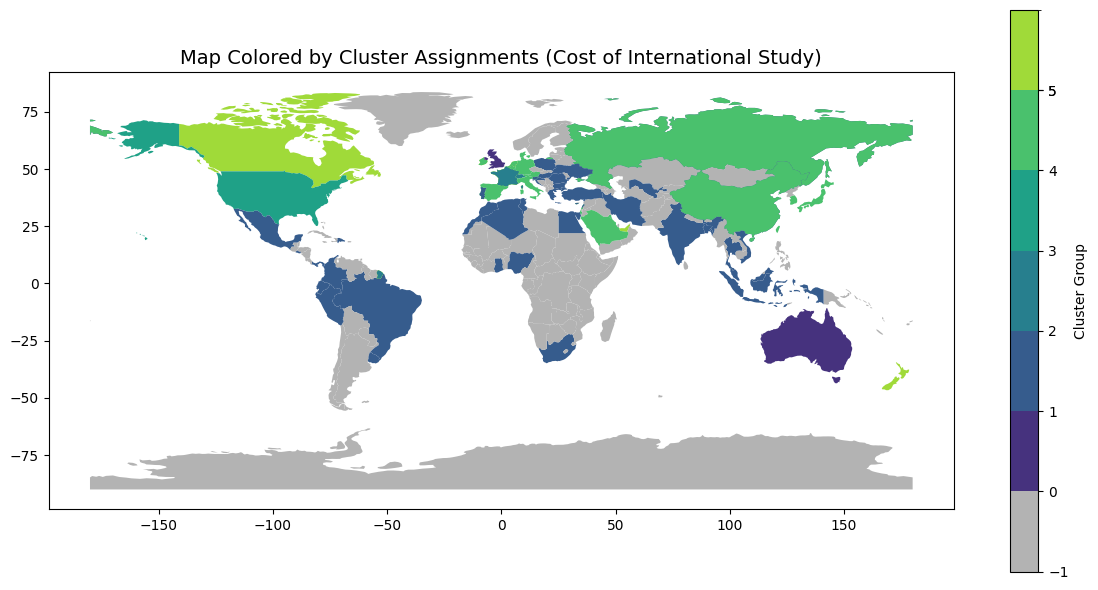

In [ ]:
#Map the cluster in to world 2d map
from matplotlib.colors import ListedColormap, BoundaryNorm


class MapLoader:
    """
    A class to download and load a world map shapefile.
    """

    def __init__(self, shapefile_url, zip_filename="ne_110m_admin_0_countries.zip", extract_folder="ne_110m_admin_0_countries"):
        """
        Initializes the MapLoader with download and extraction paths.

        Args:
            shapefile_url (str): URL of the shapefile zip file.
            zip_filename (str, optional): Local filename for the downloaded zip. Defaults to "ne_110m_admin_0_countries.zip".
            extract_folder (str, optional): Folder to extract the zip file into. Defaults to "ne_110m_admin_0_countries".
        """
        self.shapefile_url = shapefile_url
        self.zip_filename = zip_filename
        self.extract_folder = extract_folder
        self.shapefile_path = os.path.join(os.getcwd(), self.extract_folder, "ne_110m_admin_0_countries.shp") # Assuming this is the shapefile name inside the zip

    def download_and_extract(self):
        """
        Downloads the shapefile zip and extracts it.
        """
        print(f"Downloading shapefile from {self.shapefile_url}...")
        try:
            urllib.request.urlretrieve(self.shapefile_url, self.zip_filename)
            print(f"Downloaded {self.zip_filename}")

            print(f"Extracting {self.zip_filename} to {self.extract_folder}...")
            with zipfile.ZipFile(self.zip_filename, 'r') as zip_ref:
                zip_ref.extractall(self.extract_folder)
            print("Extraction complete.")

            # Clean up the zip file
            # os.remove(self.zip_filename)
            # print(f"Removed zip file: {self.zip_filename}")

        except Exception as e:
            print(f"Error during download or extraction: {e}")
            # Optionally handle cleanup of partially downloaded/extracted files here
            if os.path.exists(self.zip_filename):
                 os.remove(self.zip_filename)


    def load_map(self):
        """
        Loads the world map shapefile into a GeoDataFrame.

        Returns:
            geopandas.GeoDataFrame: The loaded world map data.
        """
        if not os.path.exists(self.shapefile_path):
            print(f"Shapefile not found at {self.shapefile_path}. Attempting download and extraction...")
            self.download_and_extract()
            if not os.path.exists(self.shapefile_path):
                print(f"Failed to load map: Shapefile still not found after download/extraction attempt.")
                return None

        print(f"Loading map from {self.shapefile_path}...")
        try:
            world_map = gpd.read_file(self.shapefile_path)
            print("Map loaded successfully.")
            return world_map
        except Exception as e:
            print(f"Error loading shapefile: {e}")
            return None

class EarthMapVisualizer:
    """
    A class to visualize Earth map colored by cluster assignments.
    """

    class Builder:
        def __init__(self):
            self.cluster_data = None
            self.world_map = None
            self.color_map = 'viridis'
            self.title = None

        def with_cluster_data(self, cluster_data):
            self.cluster_data = cluster_data
            return self

        def with_world_map(self, world_map):
            self.world_map = world_map
            return self

        def with_color_map(self, color_map):
            self.color_map = color_map
            return self

        def with_title(self, title):
            self.title = title
            return self

        def build(self):
            return EarthMapVisualizer(self)

    def __init__(self, builder):
        self.cluster_data = builder.cluster_data
        self.world_map = builder.world_map
        self.color_map = builder.color_map
        self.title = builder.title
        print(f'map color setting is: color_map={self.color_map}')

    def _replace_country_names(self):
        """Replaces country names for consistency."""
        country_replacements = {
            'USA': 'United States of America',
            'UK': 'United Kingdom',
            'UAE': 'United Arab Emirates'
        }
        self.cluster_data['Country'] = self.cluster_data['Country'].replace(country_replacements)

    def visualize(self):
      """Visualizes the map."""
      self._replace_country_names()
      # Merge cluster data into world map
      merged_data = self.world_map.merge(self.cluster_data, left_on='ADMIN', right_on='Country', how='left')
      # Replace NaNs in 'Cluster' with -1 (for missing data)
      merged_data['Cluster'] = merged_data['Cluster'].fillna(-1).astype(int)
      unique_clusters = sorted(merged_data['Cluster'].unique())
      num_clusters = len([c for c in unique_clusters if c != -1])  # Exclude -1 (no data)
      # Build color map: first color for -1 (gray), then use seaborn color palette
      cluster_colors = [(0.7, 0.7, 0.7)] + sns.color_palette(self.color_map, num_clusters)
      cmap = ListedColormap(cluster_colors)
      # Set boundaries for discrete color bins
      boundaries = [-1] + list(range(num_clusters))
      norm = BoundaryNorm(boundaries + [num_clusters], ncolors=len(cluster_colors))
      fig, ax = plt.subplots(figsize=(12, 6))
      merged_data.plot(
          column='Cluster',
          cmap=cmap,
          norm=norm,
          ax=ax,
          legend=True,
          legend_kwds={
              'boundaries': boundaries + [num_clusters],
              'ticks': boundaries + [num_clusters - 1],
              'spacing': 'uniform',
              'label': 'Cluster Group'
          }
      )
      ax.set_title(self.title, fontsize=14)
      plt.tight_layout()
      plt.show()


# Implementation of MapLoader
shapefile_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
map_loader = MapLoader(shapefile_url)
world = map_loader.load_map()

# Implement for Map Visualization
cluster_data_for_mapping = data_with_clusters[['Country', 'Cluster']].drop_duplicates()

visualizer = EarthMapVisualizer.Builder() \
    .with_cluster_data(cluster_data_for_mapping) \
    .with_world_map(world) \
    .with_color_map('viridis') \
    .with_title('Map Colored by Cluster Assignments (Cost of International Study)') \
    .build()

visualizer.visualize()

###1.7 Prediction

In [ ]:
# import pandas as pd
# from IPython.display import display

# class Predictor:
#     def __init__(self, kmeans_model, preprocessor, numerical_features):
#         self.kmeans_model = kmeans_model
#         self.preprocessor = preprocessor
#         self.numerical_features = numerical_features

#     def get_user_input(self):
#         """
#         Gets user input for the numerical features used in clustering.

#         Returns:
#             tuple: A tuple containing (user_input_dict, success_status).
#                    user_input_dict is the dictionary of inputs if successful, None otherwise.
#                    success_status is True if input was successful, False otherwise.
#         """
#         user_input = {}
#         print("Please enter the following information:")
#         for feature in self.numerical_features:
#             try:
#                 user_input[feature] = float(input(f"Enter {feature.replace('_', ' ')}: "))
#             except ValueError:
#                 print(f"Invalid input for {feature}. Please enter a number.")
#                 return None, False # Return None and False on failure

#         return user_input, True # Return the input dict and True on success


#     def predict(self, user_input):
#         """
#         Predicts the cluster for user input.

#         Args:
#             user_input (dict): A dictionary containing the user input
#                                for the features used in clustering.

#         Returns:
#             int: The predicted cluster label.
#         """
#         # Convert user input to a DataFrame, only using numerical features
#         # Ensure the order of columns in the input DataFrame matches the preprocessor
#         user_input_df = pd.DataFrame([user_input])
#         user_input_numerical = user_input_df[self.numerical_features] # Ensure correct order

#         preprocessed_input = self.preprocessor.transform(user_input_numerical)

#         # Make the prediction
#         predicted_cluster = self.kmeans_model.predict(preprocessed_input)[0]

#         return predicted_cluster

#     def display_prediction_results(self, predicted_cluster, df_data):
#         """
#         Displays the predicted cluster and the data points in that cluster.

#         Args:
#             predicted_cluster (int): The predicted cluster label.
#             df_data (DataFrame): The original DataFrame with cluster labels.
#         """
#         # Set pandas options to display all rows and columns
#         pd.set_option('display.max_rows', None)
#         pd.set_option('display.max_columns', None)

#         # Print the result
#         print(f"\nThe predicted cluster for the input is: {predicted_cluster}")

#         # Filter df_data to show data points in the predicted cluster
#         cluster_data_points = df_data[df_data['Cluster'] == predicted_cluster]

#         # Sort the data points in the predicted cluster by 'Country' and then by 'Program'
#         cluster_data_points_sorted = cluster_data_points.sort_values(by=['Country','City', 'Program', 'Tuition_USD'])

#         # Print the filtered and sorted DataFrame as a table
#         print(f"\nData points in Cluster {predicted_cluster} (sorted by Country and Program):")
#         display(cluster_data_points_sorted)

#         # Reset pandas options to default after displaying if you need to
#         pd.reset_option('display.max_rows')
#         pd.reset_option('display.max_columns')

#     def run_prediction(self, df_data):
#         """
#         Runs the entire prediction process: gets input, predicts, and displays results.

#         Args:
#             df_data (DataFrame): The original DataFrame with cluster labels.
#         """
#         user_input, input_success = self.get_user_input()

#         if input_success:
#             predicted_cluster = self.predict(user_input)
#             self.display_prediction_results(predicted_cluster, df_data)
#         else:
#             print("Prediction process aborted due to invalid input.")


# # Implementation

# # Instantiate the Predictor
# predictor = Predictor(kmeans_model, preprocessor, available_numerical_features)

# # Run the complete prediction process
# predictor.run_prediction(data_with_clusters)

###1.8 PCA Analysis

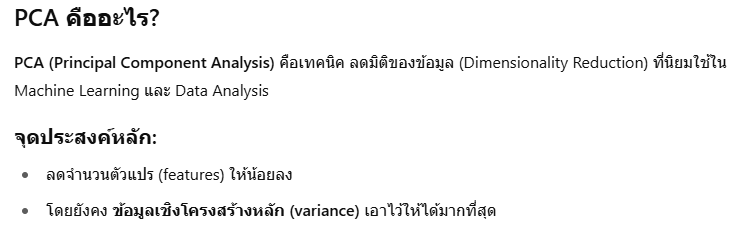

In [ ]:
import pandas as pd

# Assuming you used PCA like:
pca = PCA(n_components=2)
pca.fit(preprocessed_data)

# Show components
components_df = pd.DataFrame(
    pca.components_,
    columns=available_numerical_features,
    index=['PC1', 'PC2']
)

print(components_df.T.sort_values('PC1', ascending=False))  # Sort by PC1 importance
print(components_df.T.sort_values('PC2', ascending=False))  # Sort by PC2 importance

                        PC1       PC2
Rent_USD           0.523826 -0.091015
Insurance_USD      0.472875 -0.369969
Living_Cost_Index  0.464805 -0.311334
Tuition_USD        0.460270  0.319005
Visa_Fee_USD       0.272221  0.810028
                        PC1       PC2
Visa_Fee_USD       0.272221  0.810028
Tuition_USD        0.460270  0.319005
Rent_USD           0.523826 -0.091015
Living_Cost_Index  0.464805 -0.311334
Insurance_USD      0.472875 -0.369969


In [ ]:
def cal_stat(df_data):
    df_unique_country_cluster = df_data.drop_duplicates(subset=['City', 'Cluster']).reset_index(drop=True)

    # Select only numerical columns
    numerical_cols = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
                    'Visa_Fee_USD', 'Insurance_USD','Total_Estimated_Cost' ]

    # Group by Cluster and calculate stats
    cluster_stats = df_unique_country_cluster.groupby('Cluster')[numerical_cols].agg(['min', 'max', 'median', 'mean'])

    # Display the result
    country_per_cluster = df_unique_country_cluster.groupby('Cluster')['Country'].apply(set)
    country_per_cluster = country_per_cluster.apply(list)
    cluster_country_sets_list = country_per_cluster.tolist()
    return cluster_stats, cluster_country_sets_list


cluster_stats, cluster_country_sets_list = cal_stat(data_with_clusters)

for num, data in enumerate(cluster_country_sets_list):
    print("cluster:", num, data)

cluster_stats

cluster: 0 ['UK', 'Australia']
cluster: 1 ['Bangladesh', 'Ukraine', 'Vietnam', 'Portugal', 'Colombia', 'El Salvador', 'Lebanon', 'Uzbekistan', 'Brazil', 'Romania', 'Poland', 'Turkey', 'Ghana', 'Russia', 'Peru', 'Cyprus', 'Tunisia', 'Malaysia', 'Egypt', 'China', 'Morocco', 'Serbia', 'Croatia', 'Slovenia', 'Indonesia', 'Nigeria', 'Bulgaria', 'Czech Republic', 'India', 'Thailand', 'Iran', 'Dominican Republic', 'South Africa', 'Ecuador', 'Algeria', 'Panama', 'Greece', 'Hungary', 'Mexico', 'Uruguay']
cluster: 2 ['Switzerland', 'Singapore', 'Luxembourg', 'France']
cluster: 3 ['USA']
cluster: 4 ['Taiwan', 'Netherlands', 'Portugal', 'Japan', 'Austria', 'Italy', 'Bahrain', 'Lebanon', 'Luxembourg', 'Denmark', 'Germany', 'Russia', 'Cyprus', 'Ireland', 'China', 'Israel', 'Slovenia', 'Saudi Arabia', 'Spain', 'France', 'South Korea', 'Belgium', 'Kuwait']
cluster: 5 ['UAE', 'France', 'Netherlands', 'Singapore', 'Ireland', 'Hong Kong', 'Canada', 'New Zealand']


Tuition_USD                               Living_Cost_Index         \
                min    max   median          mean               min    max   
Cluster                                                                      
0             18700  42000  27900.0  27861.538462              63.2   83.2   
1               800  19800   3800.0   4589.215686              27.8   60.1   
2               400   8900   1450.0   2111.428571              81.5   91.5   
3             26500  56000  45000.0  44724.324324              68.5  100.0   
4               400  20000   4500.0   5925.187970              52.4   83.2   
5             15600  41500  27550.0  27020.454545              55.5   81.1   

                          Rent_USD        ... Visa_Fee_USD              \
        median       mean      min   max  ...       median        mean   
Cluster                                   ...                            
0        69.20  70.101538      750  1900  ...        490.0  478.461538   
1        44.20  44.759314      150   800  ...        100.0  109.509804   
2        85.60  86.121429     1400  2100  ...         88.0   89.785714   
3        72.40  76.194595     1300  2500  ...        160.0  160.000000   
4        67.80  68.245113      500  1500  ...        130.0  137.849624   
5        67.65  66.775000      650  1900  ...        235.0  233.386364   

        Insurance_USD                            Total_Estimated_Cost  \
                  min   max  median         mean                  min   
Cluster                                                                 
0                 650   800   800.0   760.769231              42085.0   
1                 200   500   350.0   340.441176               5700.0   
2                 800  1200  1200.0  1117.857143              35700.0   
3                1500  1500  1500.0  1500.000000              81360.0   
4                 400   850   720.0   690.150376              17275.0   
5                 600   900   750.0   748.181818              34700.0   

                                            
              max    median           mean  
Cluster                                     
0        116485.0   70190.0   70643.846154  
1         42930.0   17585.0   18086.911765  
2         92788.0   51948.0   57008.357143  
3        199860.0  114960.0  123784.324324  
4         66550.0   33010.0   33861.759398  
5        116635.0   71362.5   71219.068182  

[6 rows x 24 columns]

cluster: 0 ['UK', 'Australia']
cluster: 1 ['Bangladesh', 'Ukraine', 'Vietnam', 'Portugal', 'Colombia', 'El Salvador', 'Lebanon', 'Uzbekistan', 'Brazil', 'Romania', 'Poland', 'Turkey', 'Ghana', 'Russia', 'Peru', 'Cyprus', 'Tunisia', 'Malaysia', 'Egypt', 'China', 'Morocco', 'Serbia', 'Croatia', 'Slovenia', 'Indonesia', 'Nigeria', 'Bulgaria', 'Czech Republic', 'India', 'Thailand', 'Iran', 'Dominican Republic', 'South Africa', 'Ecuador', 'Algeria', 'Panama', 'Greece', 'Hungary', 'Mexico', 'Uruguay']
cluster: 2 ['Switzerland', 'Singapore', 'Luxembourg', 'France']
cluster: 3 ['USA']
cluster: 4 ['Taiwan', 'Netherlands', 'Portugal', 'Japan', 'Austria', 'Italy', 'Bahrain', 'Lebanon', 'Luxembourg', 'Denmark', 'Germany', 'Russia', 'Cyprus', 'Ireland', 'China', 'Israel', 'Slovenia', 'Saudi Arabia', 'Spain', 'France', 'South Korea', 'Belgium', 'Kuwait']
cluster: 5 ['UAE', 'France', 'Netherlands', 'Singapore', 'Ireland', 'Hong Kong', 'Canada', 'New Zealand']


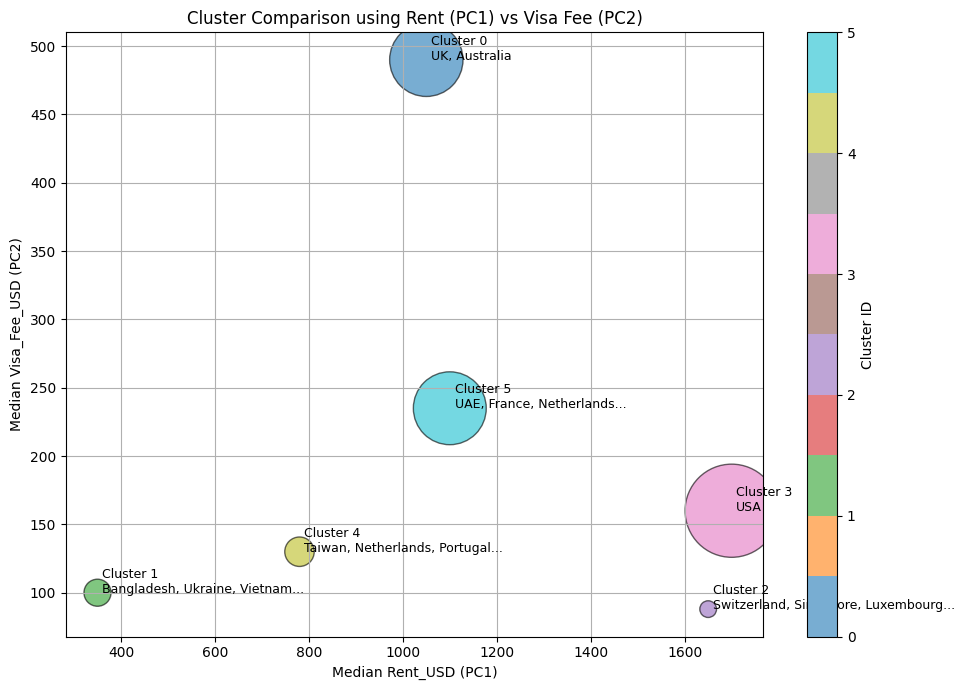

In [ ]:
def plot_cluster_bubble_from_stat(df_data, size_column='Tuition_USD'):
    """
    Generate a bubble chart from SOM/KMeans cluster stats.

    Args:
        df_data (DataFrame): The cleaned DataFrame with 'Cluster', 'City', and numerical columns.
        size_column (str): Which column to use for bubble size. Default is 'Tuition_USD'.

    Returns:
        matplotlib.figure.Figure: The bubble chart figure.
    """
    # Step 1: Prepare statistics
    df_unique_country_cluster = df_data.drop_duplicates(subset=['City', 'Cluster']).reset_index(drop=True)

    numerical_cols = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
                      'Visa_Fee_USD', 'Insurance_USD']

    cluster_stats = df_unique_country_cluster.groupby('Cluster')[numerical_cols].agg(['min', 'max', 'median', 'mean'])

    country_per_cluster = df_unique_country_cluster.groupby('Cluster')['Country'].apply(set).apply(list)
    cluster_country_sets_list = country_per_cluster.tolist()

    # Step 2: Extract median for plotting
    cluster_stats_med = cluster_stats.xs('median', axis=1, level=1)
    x = cluster_stats_med['Rent_USD']
    y = cluster_stats_med['Visa_Fee_USD']
    sizes = cluster_stats_med[size_column]

    # Step 3: Plot bubble chart
    fig, ax = plt.subplots(figsize=(10, 7))
    scatter = ax.scatter(x, y, s=sizes / 10, alpha=0.6, c=range(len(x)), cmap='tab10', edgecolors='black')

    for i, countries in enumerate(cluster_country_sets_list):
        label = f"Cluster {i}\n" + ', '.join(countries[:3]) + ('...' if len(countries) > 3 else '')
        ax.text(x[i] + 10, y[i], label, fontsize=9)

    ax.set_title("Cluster Comparison using Rent (PC1) vs Visa Fee (PC2)")
    ax.set_xlabel("Median Rent_USD (PC1)")
    ax.set_ylabel("Median Visa_Fee_USD (PC2)")
    ax.grid(True)

    fig.colorbar(scatter, ax=ax, label="Cluster ID")
    fig.tight_layout()
    return fig

cluster_stats, cluster_country_sets_list = cal_stat(data_with_clusters)

for num, data in enumerate(cluster_country_sets_list):
    print("cluster:", num, data)

cluster_stats
fig_pca_kmean = plot_cluster_bubble_from_stat(data_with_clusters)
fig_pca_kmean.savefig("cluster_bubble_kmean.png", dpi=300)


In [ ]:
import pandas as pd

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Disable line wrapping
pd.set_option('display.max_colwidth', None) # Show full column width

# Then display your DataFrame
cluster_stats_rounded = cluster_stats.round(2)
display(cluster_stats_rounded)
  # or use df_stats in a Jupyter notebook to display as a table


Tuition_USD                           Living_Cost_Index                \
                min    max   median      mean               min    max median   
Cluster                                                                         
0             18700  42000  27900.0  27861.54              63.2   83.2  69.20   
1               800  19800   3800.0   4589.22              27.8   60.1  44.20   
2               400   8900   1450.0   2111.43              81.5   91.5  85.60   
3             26500  56000  45000.0  44724.32              68.5  100.0  72.40   
4               400  20000   4500.0   5925.19              52.4   83.2  67.80   
5             15600  41500  27550.0  27020.45              55.5   81.1  67.65   

               Rent_USD                        Visa_Fee_USD              \
          mean      min   max  median     mean          min  max median   
Cluster                                                                   
0        70.10      750  1900  1050.0  1146.15          450  490  490.0   
1        44.76      150   800   350.0   360.29           40  200  100.0   
2        86.12     1400  2100  1650.0  1685.71           88  100   88.0   
3        76.19     1300  2500  1700.0  1756.76          160  160  160.0   
4        68.25      500  1500   780.0   811.88           75  250  130.0   
5        66.77      650  1900  1100.0  1117.05           90  330  235.0   

                Insurance_USD                        Total_Estimated_Cost  \
           mean           min   max  median     mean                  min   
Cluster                                                                     
0        478.46           650   800   800.0   760.77              42085.0   
1        109.51           200   500   350.0   340.44               5700.0   
2         89.79           800  1200  1200.0  1117.86              35700.0   
3        160.00          1500  1500  1500.0  1500.00              81360.0   
4        137.85           400   850   720.0   690.15              17275.0   
5        233.39           600   900   750.0   748.18              34700.0   

                                        
              max    median       mean  
Cluster                                 
0        116485.0   70190.0   70643.85  
1         42930.0   17585.0   18086.91  
2         92788.0   51948.0   57008.36  
3        199860.0  114960.0  123784.32  
4         66550.0   33010.0   33861.76  
5        116635.0   71362.5   71219.07

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import io

def fig_to_image(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    return Image.open(buf)

def compare_figures_as_images(fig1, fig2):
    img1 = fig_to_image(fig1)
    img2 = fig_to_image(fig2)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    axs[0].imshow(img1)
    axs[0].axis('off')
    axs[0].set_title("Clustering")

    axs[1].imshow(img2)
    axs[1].axis('off')
    axs[1].set_title("Cluster Bubble (Rent vs Visa Fee)")

    plt.tight_layout()
    plt.show()


<class 'matplotlib.figure.Figure'>
<class 'matplotlib.figure.Figure'>


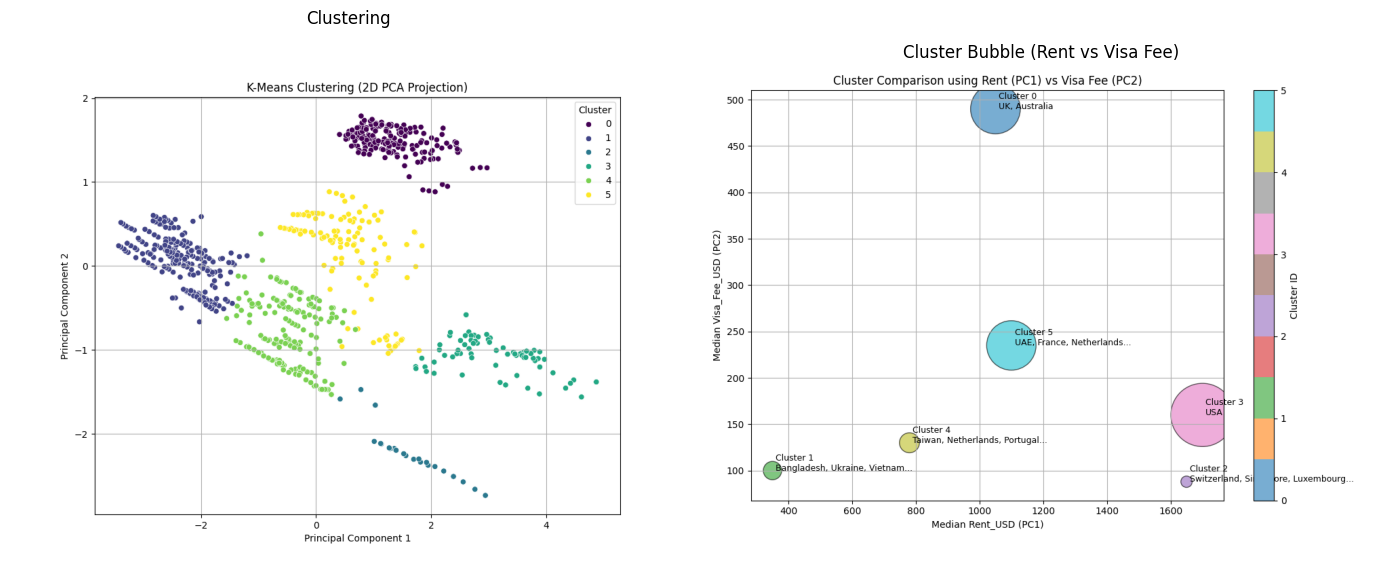

In [ ]:
print(type(kmeans_fig))
print(type(fig_pca_kmean))

# --- Comparison ---
# Ensure both figure variables are not None before comparing
if kmeans_fig is not None and fig_pca_kmean is not None:
    compare_figures_as_images(kmeans_fig, fig_pca_kmean)
else:
    print("Cannot compare figures: One or both figures could not be generated.")

#2.Clustering Master, Phd using kmeans

###2.1 Download dataset

In [ ]:
# --- Data Loading Reloading to make sure puriness ---
# Set the path to the CSV file within the Kaggle dataset
file_path = "International_Education_Costs.csv"

# Load the dataset using kagglehub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "adilshamim8/cost-of-international-education",
    file_path
)

# Display the first 5 rows of the DataFrame to verify successful loading
print("First 5 records:\n", df.head())


<ipython-input-64-f7cafa3bb462>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 82.1k/82.1k [00:00<00:00, 994kB/s]

First 5 records:
      Country       City                      University  \
0        USA  Cambridge              Harvard University   
1         UK     London         Imperial College London   
2     Canada    Toronto           University of Toronto   
3  Australia  Melbourne         University of Melbourne   
4    Germany     Munich  Technical University of Munich   

                  Program   Level  Duration_Years  Tuition_USD  \
0        Computer Science  Master             2.0        55400   
1            Data Science  Master             1.0        41200   
2      Business Analytics  Master             2.0        38500   
3             Engineering  Master             2.0        42000   
4  Mechanical Engineering  Master             2.0          500   

   Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
0               83.5      2200           160           1500           1.00  
1               75.8      1800           485            800           0.79  

###2.2 Clean Data

In [ ]:
# Build data that already cleaned, including the new calculation and filtering only Master, Phd:
data_cleaner = DataCleaner(df)
df_master_phd = data_cleaner.handle_missing_values().remove_zero_tuition().calculate_total_cost().filter_by_level(['Master', 'PhD']).build()

Display_Full_Table_Data(df_master_phd[10:40])


--- Displaying Cleaned Data ---


Country        City                       University  \
10        China     Beijing              Tsinghua University   
11  South Korea       Seoul        Seoul National University   
12      Ireland      Dublin           Trinity College Dublin   
13          USA    Stanford              Stanford University   
14          USA      Boston                              MIT   
15           UK      Oxford             University of Oxford   
16           UK   Cambridge          University of Cambridge   
17      Germany  Heidelberg            Heidelberg University   
18  Switzerland       Basel                        ETH Basel   
19  Netherlands       Delft                         TU Delft   
20    Singapore   Singapore                    NTU Singapore   
21       Canada    Waterloo           University of Waterloo   
22    Australia    Canberra   Australian National University   
23          USA     Seattle         University of Washington   
24       Canada    Edmonton            University of Alberta   
25           UK     Glasgow            University of Glasgow   
26        India   Bangalore      Indian Institute of Science   
27       Poland      Warsaw             University of Warsaw   
28  South Korea     Daejeon                            KAIST   
29        Japan       Kyoto                 Kyoto University   
30        Japan      Sendai                Tohoku University   
31        Japan     Sapporo              Hokkaido University   
32        Japan       Tokyo    Tokyo Institute of Technology   
33        Japan        Kobe                  Kobe University   
34        Japan   Hiroshima             Hiroshima University   
35    Australia       Perth  University of Western Australia   
36    Australia      Hobart           University of Tasmania   
37    Australia  Wollongong         University of Wollongong   
38    Australia  Townsville            James Cook University   
39    Australia    Armidale        University of New England   

                    Program   Level  Duration_Years  Tuition_USD  \
10     Computer Engineering  Master             2.5         8900   
11            Digital Media  Master             2.0         7200   
12           Data Analytics  Master             1.0        28900   
13         Computer Science     PhD             5.0        54200   
14   Electrical Engineering     PhD             5.0        53800   
15      Biomedical Sciences     PhD             4.0        29800   
16                  Physics     PhD             4.0        31200   
17        Molecular Biology     PhD             3.0          500   
18  Pharmaceutical Sciences     PhD             4.0         1500   
19                 Robotics     PhD             4.0         4800   
20             Data Science     PhD             4.0         8900   
21        Quantum Computing     PhD             4.0        21500   
22          Climate Science     PhD             4.0        29800   
23         Computer Science  Master             2.0        38900   
24         Computer Science     PhD             4.0        22800   
25         Computer Science  Master             1.0        33500   
26         Computer Science  Master             2.0         2500   
27         Computer Science  Master             2.0         3800   
28         Computer Science     PhD             4.0         6900   
29         Computer Science  Master             2.0         8500   
30     Software Engineering  Master             2.0         8200   
31             Data Science  Master             2.0         8100   
32  Artificial Intelligence     PhD             3.0         8900   
33         Computer Science  Master             2.0         7900   
34   Information Technology  Master             2.0         7600   
35     Software Engineering  Master             2.0        34500   
36             Data Science  Master             2.0        30800   
37  Artificial Intelligence  Master             2.0        32900   
38           Data Analytics  Master             2.0

-----------------------------


###2.3 Preprocess Clustering Data

In [ ]:
# --- Feature Selection and Preprocessing ---
# Define the desired features
# no need to include cat feature in the unsupervise leaning for this case
numerical_features = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']
# numerical_features = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']
categorical_features = []

# Create a FeatureSelector object
feature_selector = FeatureSelector(numerical_features, categorical_features)

# Select and preprocess features
available_numerical_features, available_categorical_features = feature_selector.select_features(df_master_phd)

# Instantiate the DataPreprocessor
preprocessor = DataPreprocessor(numerical_features, categorical_features)

# Fit and transform the data using the fit_transform() method
# Apply the transform method to new data for consistency.
preprocessed_data = preprocessor.fit_transform(df_master_phd)


Using numerical features for clustering: ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']
No specified categorical features found or used for clustering.


###2.4 Elbow Method

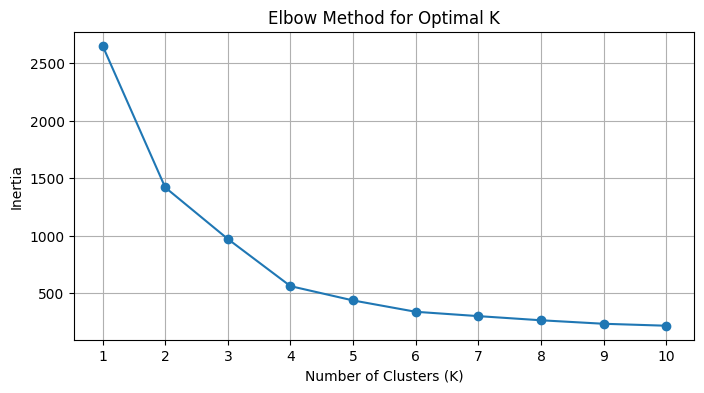

In [ ]:
elbow_method = ElbowMethod()
elbow_method.find_optimal_k(preprocessed_data)

Silhouette Scores by k:
 k  Silhouette Score
 2          0.431318
 3          0.427412
 4          0.511919
 5          0.500916
 6          0.517114
 7          0.495458
 8          0.417905
 9          0.417918
10          0.429377


<ipython-input-68-912947dc4118>:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


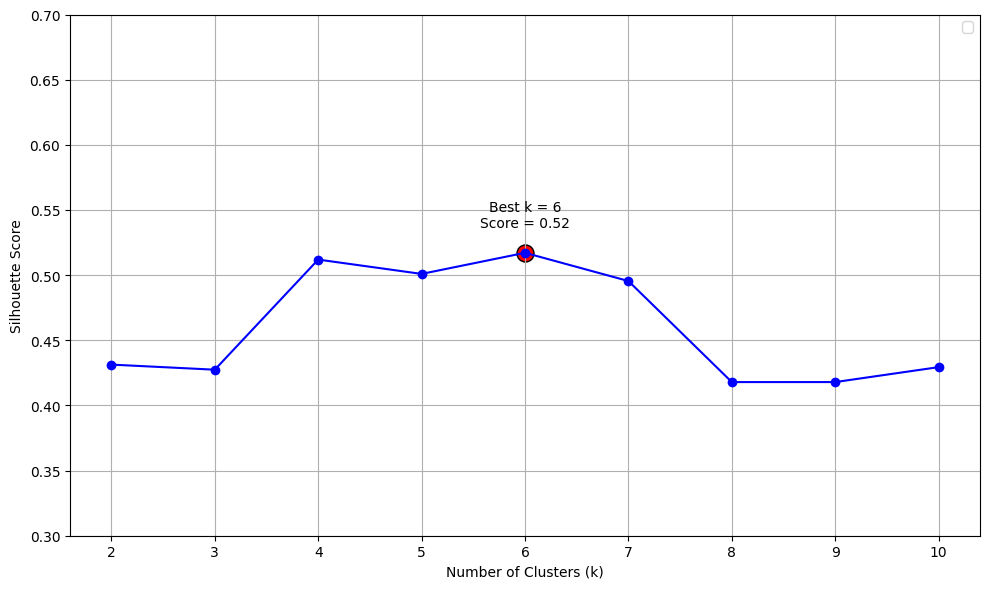

k  Silhouette Score
0   2          0.431318
1   3          0.427412
2   4          0.511919
3   5          0.500916
4   6          0.517114
5   7          0.495458
6   8          0.417905
7   9          0.417918
8  10          0.429377

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

def evaluate_kmeans_silhouette(data, k_min=2, k_max=10):
    k_values = list(range(k_min, k_max + 1))
    scores = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        scores.append(score)

    # สร้าง DataFrame แสดงผล
    results_df = pd.DataFrame({
        "k": k_values,
        "Silhouette Score": scores
    })

    # หาค่า k ที่ดีที่สุด
    best_index = np.argmax(scores)
    best_k = k_values[best_index]
    best_score = scores[best_index]

    # แสดงตารางคะแนน
    print("Silhouette Scores by k:")
    print(results_df.to_string(index=False))

    # วาดกราฟ
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, scores, marker='o', linestyle='-', color='blue')
    plt.scatter(best_k, best_score, color='red', s=150, edgecolors='black')
    plt.text(best_k, best_score + 0.02, f'Best k = {best_k}\nScore = {best_score:.2f}', ha='center', fontsize=10)

    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.legend()
    plt.ylim(0.3, 0.7)
    plt.tight_layout()
    plt.show()

    return results_df

# เรียกใช้กับข้อมูลที่เตรียมไว้
evaluate_kmeans_silhouette(preprocessed_data)


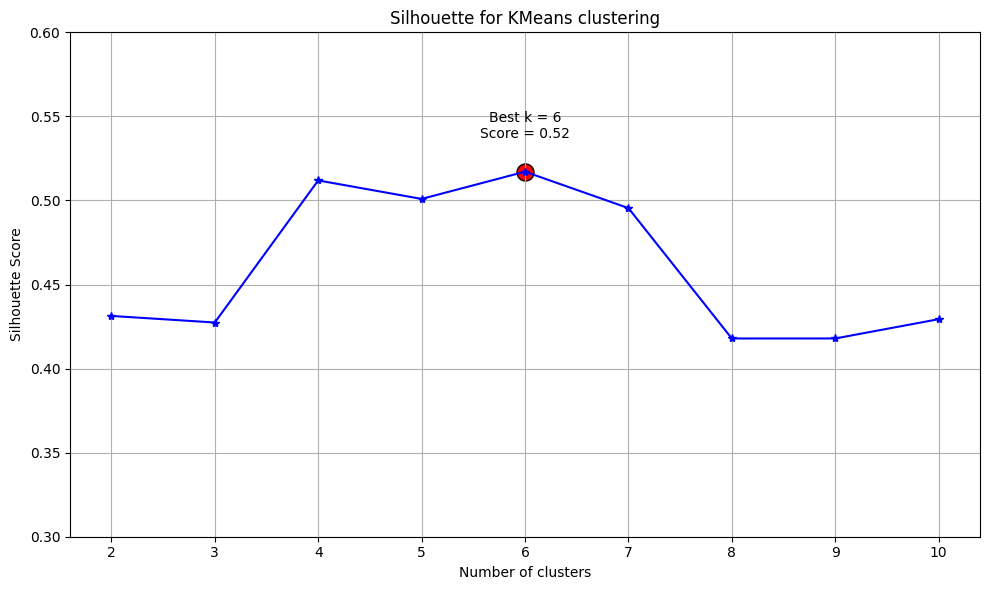

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

def plot_silhouette_scores(data, k_range=range(2, 11)):
    scores = []

    # คำนวณ Silhouette Score สำหรับแต่ละค่า k
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        scores.append(score)

    # หาค่า k ที่ได้ score สูงสุด
    best_k = k_range[np.argmax(scores)]
    best_score = max(scores)

    # วาดกราฟ
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, scores, marker='*', linestyle='-', color='blue')
    plt.scatter(best_k, best_score, color='red', s=150, edgecolors='black')
    plt.text(best_k, best_score + 0.02, f'Best k = {best_k}\nScore = {best_score:.2f}', ha='center', fontsize=10)

    plt.title("Silhouette for KMeans clustering")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.ylim(0.3, 0.6)
    plt.tight_layout()
    plt.show()

# ใช้งาน
plot_silhouette_scores(preprocessed_data)


###2.5 Clustering

Enter the desired number of clusters: 6


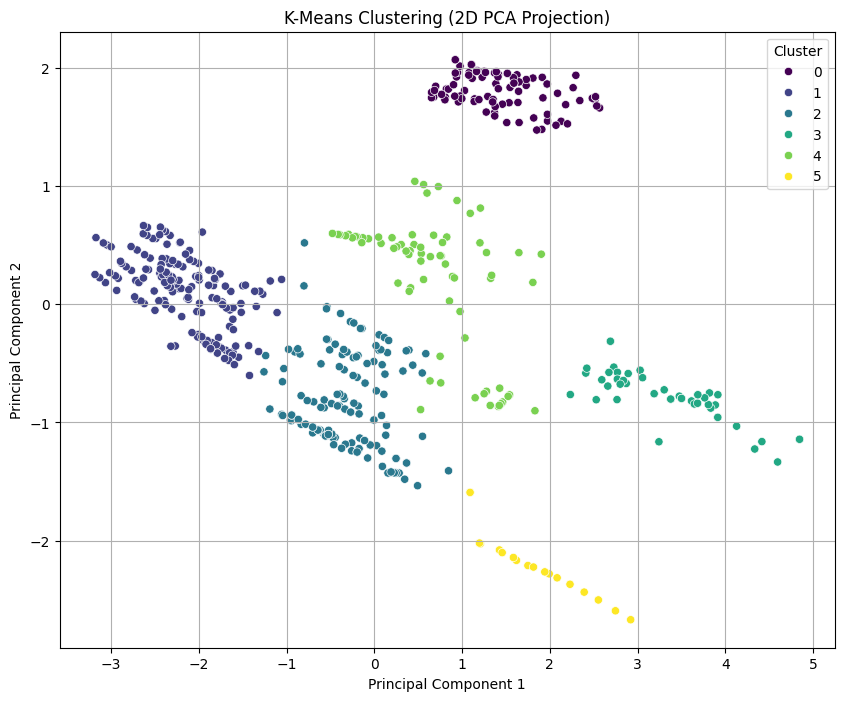


Analyzing the characteristics of each cluster:
          Tuition_USD  Living_Cost_Index     Rent_USD  Visa_Fee_USD  \
Cluster                                                               
0        34708.791209          68.217582  1302.197802    462.692308   
1         4593.037975          45.161392   371.898734    111.329114   
2         5910.563380          70.671831   860.422535    125.549296   
3        51202.000000          78.496000  1928.000000    160.000000   
4        27560.563380          68.704225  1195.070423    217.183099   
5         1812.222222          98.816667  1711.111111    112.333333   

         Insurance_USD  
Cluster                 
0           704.395604  
1           341.772152  
2           730.352113  
3          1500.000000  
4           705.492958  
5          1161.111111  

Data points in Cluster 0 (sorted by Country):


Country         City                           University  \
183  Australia   Gold Coast                  Griffith University   
173  Australia       Sydney      University of Technology Sydney   
175  Australia    Melbourne                      RMIT University   
176  Australia    Melbourne                      RMIT University   
177  Australia   Wollongong             University of Wollongong   
178  Australia   Wollongong             University of Wollongong   
179  Australia    Newcastle              University of Newcastle   
180  Australia    Newcastle              University of Newcastle   
181  Australia       Hobart               University of Tasmania   
182  Australia       Hobart               University of Tasmania   
184  Australia   Gold Coast                  Griffith University   
185  Australia     Canberra               University of Canberra   
186  Australia     Canberra               University of Canberra   
187  Australia   Townsville                James Cook University   
188  Australia   Townsville                James Cook University   
172  Australia     Brisbane  Queensland University of Technology   
189  Australia     Armidale            University of New England   
191  Australia    Toowoomba    University of Southern Queensland   
192  Australia    Toowoomba    University of Southern Queensland   
193  Australia     Ballarat                Federation University   
194  Australia     Ballarat                Federation University   
195  Australia      Lismore            Southern Cross University   
196  Australia      Lismore            Southern Cross University   
200  Australia    Melbourne              University of Melbourne   
204  Australia       Sydney                 University of Sydney   
207  Australia     Brisbane             University of Queensland   
211  Australia        Perth      University of Western Australia   
231  Australia   Wollongong             University of Wollongong   
214  Australia     Adelaide               University of Adelaide   
217  Australia     Canberra       Australian National University   
221  Australia   Gold Coast                  Griffith University   
190  Australia     Armidale            University of New England   
171  Australia     Brisbane  Queensland University of Technology   
174  Australia       Sydney      University of Technology Sydney   
169  Australia        Perth      University of Western Australia   
3    Australia    Melbourne              University of Melbourne   
22   Australia     Canberra       Australian National University   
35   Australia        Perth      University of Western Australia   
36   Australia       Hobart               University of Tasmania   
37   Australia   Wollongong             University of Wollongong   
38   Australia   Townsville                James Cook University   
39   Australia     Armidale            University of New England   
170  Australia        Perth      University of Western Australia   
155  Australia    Melbourne              University of Melbourne   
156  Australia    Melbourne              University of Melbourne   
157  Australia       Sydney                 University of Sydney   
158  Australia       Sydney                 University of Sydney   
224  Australia    Newcastle              University of Newcastle   
165  Australia    Melbourne                    Monash University   
160  Australia     Canberra       Australian National University   
161  Australia     Brisbane             University of Queensland   
168  Australia     Adelaide               University of Adelaide   
162  Australia     Brisbane             University of Queensland   
163  Australia       Sydney        University of New South Wales   
164  Australia       Sydney        University of New South Wales   
159  Australia     Canberra       Australian National University   
166  Australia    Melbourne                    Monash University   
167  Australia     Adelaide               University of Adelaid


Data points in Cluster 1 (sorted by Country):


Country               City  \
432             Algeria               Oran   
438             Algeria        Constantine   
444             Algeria             Annaba   
473          Bangladesh             Sylhet   
468          Bangladesh           Rajshahi   
450          Bangladesh              Dhaka   
456          Bangladesh         Chittagong   
462          Bangladesh             Khulna   
348              Brazil     Rio de Janeiro   
442            Bulgaria             Burgas   
424            Bulgaria              Sofia   
436            Bulgaria              Varna   
447            Bulgaria               Ruse   
109               China            Chengdu   
10                China            Beijing   
107               China              Wuhan   
106               China          Guangzhou   
105               China            Nanjing   
104               China           Hangzhou   
103               China           Shanghai   
108               China              Xi'an   
102               China           Shanghai   
71                China           Shenzhen   
100               China            Beijing   
101               China            Beijing   
369            Colombia             Bogota   
373            Colombia           Medellin   
392            Colombia          Cartagena   
385            Colombia        Bucaramanga   
381            Colombia       Barranquilla   
398             Croatia             Zagreb   
402             Croatia              Split   
415             Croatia              Zadar   
406             Croatia             Rijeka   
420             Croatia          Dubrovnik   
419              Cyprus              Girne   
410              Cyprus          Famagusta   
411  Dominican Republic          San Pedro   
416  Dominican Republic       Puerto Plata   
403  Dominican Republic           Santiago   
427             Ecuador          Guayaquil   
445             Ecuador             Ambato   
433             Ecuador             Cuenca   
422             Ecuador              Quito   
358               Egypt               Giza   
361               Egypt          Port Said   
354               Egypt         Alexandria   
368               Egypt              Aswan   
467         El Salvador         San Miguel   
455         El Salvador       San Salvador   
448               Ghana                 Ho   
425               Ghana              Accra   
431               Ghana             Kumasi   
443               Ghana             Tamale   
437               Ghana         Cape Coast   
68               Greece             Athens   
336             Hungary            Miskolc   
343             Hungary          Kecskemet   
340             Hungary           Veszprem   
331             Hungary               Pecs   
328             Hungary             Szeged   
322             Hungary           Budapest   
364               India               Pune   
360               India          Hyderabad   
356               India            Chennai   
352               India              Delhi   
349               India             Mumbai   
344               India          Bangalore   
26                India          Bangalore   
367               India             Kanpur   
391           Indonesia           Semarang   
388           Indonesia             Malang   
395           Indonesia           Denpasar   
372           Indonesia            Jakarta   
377           Indonesia            Bandung   
380           Indonesia         Yogyakarta   
454                Iran             Tehran   
466                Iran            Mashhad   
477                Iran             Tabriz   
471                Iran             Shiraz   
434             Lebanon            Tripoli   
440             Lebanon            Jounieh   
428             Lebanon             Byblos   
520            Malaysia          Shah Alam   
509            Malaysia              Bangi   
515            Malaysia             Melaka   
498           


Data points in Cluster 2 (sorted by Country):


Country              City  \
303       Austria              Linz   
297       Austria            Vienna   
309       Austria         Innsbruck   
312       Austria        Klagenfurt   
316       Austria            Leoben   
429       Bahrain             Riffa   
446       Bahrain          Muharraq   
441       Bahrain            Sakhir   
339       Belgium             Liege   
342       Belgium              Mons   
330       Belgium           Antwerp   
321       Belgium            Leuven   
324       Belgium             Ghent   
327       Belgium          Brussels   
333       Belgium           Louvain   
405        Cyprus           Larnaca   
397        Cyprus           Nicosia   
98        Denmark            Aarhus   
99        Denmark           Aalborg   
97        Denmark        Copenhagen   
89         France            Rennes   
88         France          Bordeaux   
87         France          Grenoble   
86         France              Lyon   
508        France          Bordeaux   
90         France       Montpellier   
497        France          Toulouse   
503        France         Marseille   
239        France              Lyon   
248        France          Bordeaux   
252        France              Nice   
256        France             Lille   
261        France        Strasbourg   
265        France          Grenoble   
526        France        Strasbourg   
8          France             Paris   
490        France              Lyon   
514        France              Nice   
17        Germany        Heidelberg   
4         Germany            Munich   
42        Germany         Karlsruhe   
45        Germany          Freiburg   
43        Germany      Braunschweig   
41        Germany           Hamburg   
40        Germany           Dresden   
44        Germany          Hannover   
244       Ireland            Galway   
266       Ireland           Athlone   
257       Ireland         Waterford   
253       Ireland          Maynooth   
525         Italy             Padua   
315         Italy              Pisa   
296         Italy             Milan   
308         Italy          Florence   
299         Italy              Rome   
305         Italy           Bologna   
311         Italy            Naples   
318         Italy             Padua   
302         Italy             Turin   
502         Italy           Bologna   
519         Italy              Pisa   
496         Italy             Turin   
484         Italy             Milan   
507         Italy          Florence   
5           Japan             Tokyo   
30          Japan            Sendai   
31          Japan           Sapporo   
32          Japan             Tokyo   
29          Japan             Kyoto   
33          Japan              Kobe   
34          Japan         Hiroshima   
463        Kuwait          Al Jahra   
474        Kuwait         Al Ahmadi   
457        Kuwait           Hawalli   
451        Kuwait       Kuwait City   
423       Lebanon            Beirut   
387    Luxembourg       Differdange   
394    Luxembourg         Bertrange   
371    Luxembourg   Luxembourg City   
376    Luxembourg  Esch-sur-Alzette   
384    Luxembourg         Kirchberg   
286   Netherlands         Groningen   
280   Netherlands         Eindhoven   
75    Netherlands          Nijmegen   
76    Netherlands           Utrecht   
273   Netherlands         Rotterdam   
277   Netherlands             Delft   
73    Netherlands         Eindhoven   
77    Netherlands        Wageningen   
74    Netherlands         Groningen   
294   Netherlands        Wageningen   
19    Netherlands             Delft   
78    Netherlands         Amsterdam   
290   Netherlands           Tilburg   
274      Portugal             Porto   
270      Portugal            Lisbon   
486  Saudi Arabia            Jeddah   
492  Saudi Arabia           Dhahran   
480  Saudi Arabia            Riyadh   
527  Saudi Arabia           Al-Ahsa   
72   Saudi Arabia            Riyadh   
510  Saudi Arabia              T


Data points in Cluster 3 (sorted by Country):


Country              City                  University  \
0       USA         Cambridge          Harvard University   
241     USA            Boston     Northeastern University   
245     USA           Seattle    University of Washington   
249     USA            Austin                   UT Austin   
254     USA            Denver        University of Denver   
258     USA          Portland   Portland State University   
262     USA       Minneapolis     University of Minnesota   
268     USA            Boston     Northeastern University   
272     USA            Austin                   UT Austin   
276     USA         San Diego                UC San Diego   
279     USA           Seattle    University of Washington   
283     USA           Atlanta                Georgia Tech   
285     USA        Pittsburgh             Carnegie Mellon   
289     USA           Raleigh         NC State University   
293     USA             Davis                    UC Davis   
481     USA            Boston          Harvard University   
487     USA          Stanford         Stanford University   
493     USA          Berkeley                 UC Berkeley   
499     USA               MIT               Massachusetts   
505     USA          New York         Columbia University   
511     USA       Los Angeles                        UCLA   
516     USA           Chicago       University of Chicago   
237     USA           Chicago       University of Chicago   
232     USA     San Francisco       UC Berkeley Extension   
228     USA         San Diego                UC San Diego   
225     USA        Pittsburgh             Carnegie Mellon   
13      USA          Stanford         Stanford University   
14      USA            Boston                         MIT   
23      USA           Seattle    University of Washington   
46      USA      Philadelphia  University of Pennsylvania   
47      USA           Chicago       University of Chicago   
48      USA         Baltimore               Johns Hopkins   
49      USA            Durham             Duke University   
50      USA           Madison     University of Wisconsin   
51      USA           Boulder      University of Colorado   
52      USA             Davis                    UC Davis   
522     USA     San Francisco         Stanford University   
65      USA        Pittsburgh             Carnegie Mellon   
69      USA          New York         Columbia University   
70      USA            Ithaca          Cornell University   
197     USA            Boston                         MIT   
201     USA          Stanford         Stanford University   
205     USA          Berkeley                 UC Berkeley   
208     USA          New York         Columbia University   
212     USA           Atlanta                Georgia Tech   
215     USA       Los Angeles                        UCLA   
218     USA            Austin                   UT Austin   
222     USA           Seattle    University of Washington   
66      USA  Urbana-Champaign                        UIUC   
528     USA           Seattle    University of Washington   

                     Program   Level  Duration_Years  Tuition_USD  \
0           Computer Science  Master             2.0        55400   
241           Data Analytics  Master             2.0        54000   
245             Data Science     PhD             4.0        51000   
249         Computer Science  Master             2.0        49000   
254           Data Analytics  Master             2.0        47000   
258             Data Science  Master             2.0        45000   
262         Computer Science     PhD             4.0        48000   
268             Data Science  Master             2.0        54000   
272                 Robotics     PhD             5.0        48000   
276            Biotechnology  Master             2.0        49000   
279     Computer Engineering  Master             2.0        51000   
283         Machine Learning     PhD             5.0        4800


Data points in Cluster 4 (sorted by Country):


Country            City                          University  \
2         Canada         Toronto               University of Toronto   
139       Canada          London                  Western University   
140       Canada        Kingston                  Queen's University   
141       Canada        Victoria              University of Victoria   
142       Canada         Halifax                Dalhousie University   
143       Canada        Winnipeg              University of Manitoba   
144       Canada     Quebec City                    Laval University   
145       Canada       Saskatoon          University of Saskatchewan   
147       Canada          Regina                University of Regina   
148       Canada      Sherbrooke            University of Sherbrooke   
149       Canada         Windsor               University of Windsor   
150       Canada         Moncton         University of New Brunswick   
151       Canada  Trois-Rivieres                                UQTR   
152       Canada     Thunder Bay                 Lakehead University   
153       Canada         Sudbury               Laurentian University   
154       Canada   Prince George                                UNBC   
199       Canada         Toronto               University of Toronto   
203       Canada       Vancouver      University of British Columbia   
206       Canada        Montreal                   McGill University   
210       Canada          Ottawa                University of Ottawa   
216       Canada        Edmonton               University of Alberta   
220       Canada         Halifax                Dalhousie University   
227       Canada        Victoria              University of Victoria   
230       Canada        Winnipeg              University of Manitoba   
138       Canada        Hamilton                 McMaster University   
137       Canada         Calgary               University of Calgary   
146       Canada      St. John's                 Memorial University   
135       Canada        Edmonton               University of Alberta   
136       Canada          Ottawa                University of Ottawa   
24        Canada        Edmonton               University of Alberta   
59        Canada       London ON                  Western University   
60        Canada         Halifax                Dalhousie University   
61        Canada     Quebec City                    Laval University   
62        Canada      St. John's                 Memorial University   
63        Canada       Saskatoon          University of Saskatchewan   
64        Canada      Sherbrooke            Université de Sherbrooke   
21        Canada        Waterloo              University of Waterloo   
133       Canada        Waterloo              University of Waterloo   
134       Canada        Montreal              University of Montreal   
132       Canada        Montreal                   McGill University   
131       Canada       Vancouver      University of British Columbia   
130       Canada         Toronto               University of Toronto   
85        France           Paris                 École Polytechnique   
236      Ireland          Dublin              Trinity College Dublin   
12       Ireland          Dublin              Trinity College Dublin   
240      Ireland            Cork             University College Cork   
6    Netherlands       Amsterdam             University of Amsterdam   
269  Netherlands       Amsterdam             University of Amsterdam   
275  New Zealand    Christchurch            University of Canterbury   
288  New Zealand        Auckland                      AUT University   
282  New Zealand        Hamilton               University of Waikato   
267  New Zealand        Auckland              University of Auckland   
271  New Zealand      Wellington                 Victoria University   
292  New Zealand    Christchurch                  Lincoln University   
278  New Zealand         Dunedin                 


Data points in Cluster 5 (sorted by Country):


Country        City                University  \
485       France       Paris       Sorbonne University   
235       France       Paris       Sorbonne University   
260  Switzerland      Lugano                USI Lugano   
255  Switzerland        Bern        University of Bern   
251  Switzerland  St. Gallen  University of St. Gallen   
247  Switzerland       Basel       University of Basel   
243  Switzerland      Geneva      University of Geneva   
238  Switzerland    Lausanne                      EPFL   
9    Switzerland      Zurich                ETH Zurich   
96   Switzerland  Winterthur                      ZHAW   
95   Switzerland       Basel       University of Basel   
94   Switzerland   Neuchatel   University of Neuchatel   
93   Switzerland      Lugano                       USI   
92   Switzerland        Bern        University of Bern   
91   Switzerland    Lausanne                      EPFL   
18   Switzerland       Basel                 ETH Basel   
264  Switzerland    Fribourg    University of Fribourg   
234  Switzerland      Zurich                ETH Zurich   

                     Program   Level  Duration_Years  Tuition_USD  \
485         Computer Science  Master             2.0         4500   
235           Data Analytics  Master             2.0         4500   
260           Data Analytics  Master             2.0         1500   
255             Data Science  Master             2.0         1500   
251           Data Analytics  Master             2.0         1500   
247             Data Science  Master             2.0         1500   
243             Data Science  Master             2.0         1500   
238         Computer Science     PhD             4.0         1500   
9                    Physics  Master             2.0         1460   
96          Data Engineering  Master             2.0         1460   
95     Computational Science  Master             2.0         1440   
94       Information Systems  Master             2.0         1420   
93   Artificial Intelligence  Master             2.0         1460   
92      Software Engineering  Master             2.0         1420   
91          Computer Science  Master             2.0         1460   
18   Pharmaceutical Sciences     PhD             4.0         1500   
264         Computer Science  Master             2.0         1500   
234         Computer Science  Master             2.0         1500   

     Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  \
485               84.3      1800            99            850           0.92   
235               84.3      1800            99            850           0.92   
260              108.9      1400           140           1200           0.89   
255              110.4      1500           140           1200           0.89   
251              112.1      1600           140           1200           0.89   
247              114.3      1700           140           1200           0.89   
243              116.5      1800           140           1200           0.89   
238              119.8      1900           140           1200           0.89   
9                 91.5      2100            88           1200           0.89   
96                86.4      1700            88           1200           0.89   
95                87.5      1800            88           1200           0.89   
94                84.2      1500            88           1200           0.89   
93                84.5      1500            88           1200           0.89   
92                85.4      1700            88           1200           0.89   
91                89.8      1900            88           1200           0.89   
18                88.6      1800            88           1200           0.89   
264              107.8      1300           140           1200           0.89   
234              122.4      2000           140           1200           0.89   

     Total_Estimated_Cost  Cluster  
485               49499.0        5  

Visualization saved successfully to clusters_master_phd.png


In [ ]:
#Instantiate the clustering facade
kmeans_clustering = KMeansClustering()

#Performclustering
kmeans_clustering.perform_clustering(preprocessed_data, df_master_phd, available_numerical_features)

#Access the model or data with clusters if needed
kmeans_model = kmeans_clustering.get_kmeans_model()
data_with_clusters_for_master_phd = kmeans_clustering.get_data_with_clusters()

#Save Image
kmeans_master_fig = kmeans_clustering.get_current_figure()
kmeans_clustering.save_visualization("clusters_master_phd.png")


In [ ]:
df_unique_country_cluster = data_with_clusters_for_master_phd.drop_duplicates(subset=['Country', 'Cluster']).reset_index(drop=True)
Display_Full_Table_Data(df_unique_country_cluster)


--- Displaying Cleaned Data ---


Country             City                            University  \
0                  USA        Cambridge                    Harvard University   
1                   UK           London               Imperial College London   
2               Canada          Toronto                 University of Toronto   
3            Australia        Melbourne               University of Melbourne   
4              Germany           Munich        Technical University of Munich   
5                Japan            Tokyo                   University of Tokyo   
6          Netherlands        Amsterdam               University of Amsterdam   
7            Singapore        Singapore      National University of Singapore   
8               France            Paris                   Sorbonne University   
9          Switzerland           Zurich                            ETH Zurich   
10               China          Beijing                   Tsinghua University   
11         South Korea            Seoul             Seoul National University   
12             Ireland           Dublin                Trinity College Dublin   
13         Netherlands            Delft                              TU Delft   
14           Singapore        Singapore                         NTU Singapore   
15               India        Bangalore           Indian Institute of Science   
16              Poland           Warsaw                  University of Warsaw   
17              Russia           Moscow               Moscow State University   
18              Greece           Athens         National Technical University   
19        Saudi Arabia           Riyadh                  King Saud University   
20              France            Paris                   École Polytechnique   
21             Denmark       Copenhagen              University of Copenhagen   
22              France            Paris                   Sorbonne University   
23             Ireland           Galway                            NUI Galway   
24         New Zealand         Auckland                University of Auckland   
25            Portugal           Lisbon                  University of Lisbon   
26            Portugal            Braga                   University of Minho   
27               Spain           Madrid     Universidad Politécnica de Madrid   
28               Italy            Milan                 Politecnico di Milano   
29             Austria           Vienna                               TU Wien   
30              Mexico        Monterrey              Tecnológico de Monterrey   
31              Turkey         Istanbul                   Bogazici University   
32             Belgium           Leuven                             KU Leuven   
33             Hungary         Budapest     Budapest University of Technology   
34            Thailand          Bangkok              Chulalongkorn University   
35                 UAE            Dubai                   University of Dubai   
36              Brazil   Rio de Janeiro                               PUC-Rio   
37               Egypt       Alexandria                 Alexandria University   
38            Colombia           Bogota                  Universidad Nacional   
39          Luxembourg  Luxembourg City              University of Luxembourg   
40           Indonesia          Jakarta               University of Indonesia   
41             Romania      Cluj-Napoca               Babes-Bolyai University   
42             Tunisia            Tunis                   University of Tunis   
43              Cyprus          Nicosia                  University of Cyprus   
44             Croatia           Zagreb                  University of Zagreb   
45             Morocco            Rabat                 Mohammed V University   
46                Peru             Lima                                  PUCP   
47  Dominican Republic         Santiago                                 PUCMM   
48              Cyprus        Famagusta      E

-----------------------------


In [ ]:
from IPython.display import clear_output
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ipywidgets import interact, IntSlider, fixed


#INteractive K-Mean Clustering

class KMeansPlotBuilder:
    """
    A builder class for creating interactive K-Means clustering plots.
    """
    def __init__(self, data):
        self.data = data
        self.k_range = (1, 10)
        self.random_state = 42
        self.n_init = 10
        self.pca_components = 2
        self.palette = 'tab10'
        self.figure_size = (9, 6)
        self.title_prefix = "K-Means Clustering"
        self.xlabel = "Principal Component 1"
        self.ylabel = "Principal Component 2"

    def with_k_range(self, k_range):
        """Sets the range for the number of clusters (k)."""
        self.k_range = k_range
        return self

    def with_random_state(self, random_state):
        """Sets the random state for K-Means."""
        self.random_state = random_state
        return self

    def with_n_init(self, n_init):
        """Sets the number of initializations for K-Means."""
        self.n_init = n_init
        return self

    def with_pca_components(self, pca_components):
        """Sets the number of PCA components for visualization."""
        self.pca_components = pca_components
        return self

    def with_palette(self, palette):
        """Sets the color palette for the plot."""
        self.palette = palette
        return self

    def with_figure_size(self, figure_size):
        """Sets the size of the plot figure."""
        self.figure_size = figure_size
        return self

    def with_title_prefix(self, title_prefix):
        """Sets the prefix for the plot title."""
        self.title_prefix = title_prefix
        return self

    def with_axis_labels(self, xlabel, ylabel):
        """Sets the labels for the x and y axes."""
        self.xlabel = xlabel
        self.ylabel = ylabel
        return self

    def build(self):
        """Builds and returns the interactive plot function."""
        def kmeans_interactive_plot_built(k):
            clear_output(wait=True)
            kmeans = KMeans(n_clusters=k, n_init=self.n_init, random_state=self.random_state)
            labels = kmeans.fit_predict(self.data)

            # PCA for 2D visualization
            pca = PCA(n_components=self.pca_components)
            pca_data = pca.fit_transform(self.data)
            df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(self.pca_components)])
            df["Cluster"] = labels

            # Silhouette score
            sil_score = silhouette_score(self.data, labels) if k > 1 else 0

            # Plot
            plt.figure(figsize=self.figure_size)
            sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue="Cluster",
                            palette=self.palette, legend="full")
            plt.title(f"{self.title_prefix} (k={k}) - Silhouette Score: {sil_score:.4f}")
            plt.xlabel(self.xlabel)
            plt.ylabel(self.ylabel)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

        return kmeans_interactive_plot_built

# Example usage with the builder:
# Assuming preprocessed_data is available from your previous steps

# Create a builder instance with the data
plot_builder = KMeansPlotBuilder(preprocessed_data)

# Configure the builder (optional, uses defaults if not set)
interactive_plot_function = plot_builder \
    .with_k_range((1, 10)) \
    .with_random_state(42) \
    .with_n_init(10) \
    .with_pca_components(2) \
    .with_palette('viridis') \
    .with_figure_size((10, 7)) \
    .with_title_prefix("International Education Cost Clustering (Interactive)") \
    .with_axis_labels("PCA 1", "PCA 2") \
    .build()

# Create the interactive slider and link it to the built function
interact(interactive_plot_function, k=IntSlider(min=plot_builder.k_range[0], max=plot_builder.k_range[1], step=1, value=3));

interactive(children=(IntSlider(value=3, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

###2.6 Stat & Map Visualization

In [ ]:
country_per_cluster = df_unique_country_cluster.groupby('Cluster')['Country'].apply(set)
country_per_cluster = country_per_cluster.apply(list)

# Iterate through the actual index (cluster labels) of the Series
for cluster_label in country_per_cluster.index:
    print(f"Cluster {cluster_label}: {country_per_cluster[cluster_label]}")


Cluster 0: ['UK', 'Australia']
Cluster 1: ['Bangladesh', 'Ukraine', 'Portugal', 'Colombia', 'El Salvador', 'Lebanon', 'Uzbekistan', 'Brazil', 'Romania', 'Poland', 'Turkey', 'Ghana', 'Russia', 'Peru', 'Cyprus', 'Tunisia', 'Malaysia', 'Egypt', 'China', 'Morocco', 'Serbia', 'Croatia', 'Slovenia', 'Indonesia', 'Bulgaria', 'India', 'Thailand', 'Iran', 'Dominican Republic', 'Ecuador', 'Algeria', 'Panama', 'Greece', 'Hungary', 'Mexico', 'Uruguay']
Cluster 2: ['Netherlands', 'Portugal', 'Japan', 'Austria', 'Italy', 'Bahrain', 'Lebanon', 'Luxembourg', 'Denmark', 'Germany', 'Cyprus', 'Singapore', 'Ireland', 'Saudi Arabia', 'Spain', 'France', 'South Korea', 'Belgium', 'Kuwait']
Cluster 3: ['USA']
Cluster 4: ['UAE', 'France', 'Netherlands', 'Singapore', 'Ireland', 'Canada', 'New Zealand']
Cluster 5: ['Switzerland', 'France']


map color setting is: color_map=viridis


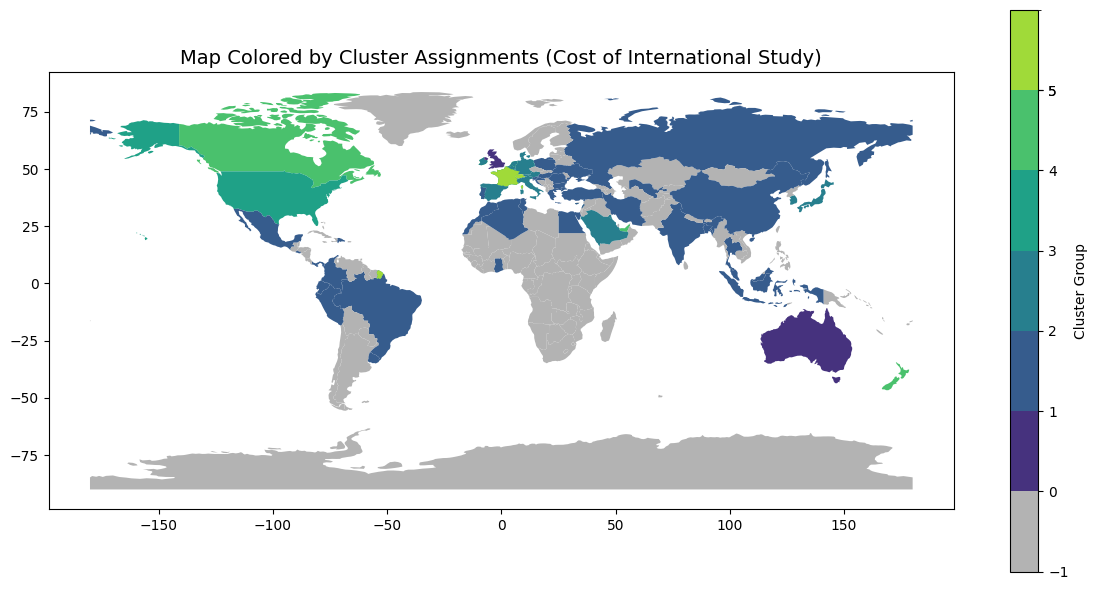

In [ ]:
#Map Visuallizer

cluster_data_for_mapping = data_with_clusters_for_master_phd[['Country', 'Cluster']].drop_duplicates()

visualizer = EarthMapVisualizer.Builder() \
    .with_cluster_data(cluster_data_for_mapping) \
    .with_world_map(world) \
    .with_color_map('viridis') \
    .with_title('Map Colored by Cluster Assignments (Cost of International Study)') \
    .build()

visualizer.visualize()

In [ ]:
# Select only numerical column
numerical_cols = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
                  'Visa_Fee_USD', 'Insurance_USD', 'Total_Estimated_Cost']

# Group by Cluster and calculate stats
cluster_stats = df_unique_country_cluster.groupby('Cluster')[numerical_cols].agg(['min', 'max', 'median', 'mean'])

# Display the result
cluster_stats


Tuition_USD                               Living_Cost_Index        \
                min    max   median          mean               min   max   
Cluster                                                                     
0             41200  42000  41600.0  41600.000000              71.2  75.8   
1              1100  18000   4250.0   5463.888889              30.5  62.4   
2               400  20000   7000.0   6684.210526              52.4  83.2   
3             55400  55400  55400.0  55400.000000              83.5  83.5   
4             15600  38500  28900.0  27257.142857              72.4  81.1   
5              1460   4500   2980.0   2980.000000              84.3  91.5   

                          Rent_USD                            Visa_Fee_USD  \
        median       mean      min   max  median         mean          min   
Cluster                                                                      
0         73.5  73.500000     1400  1800  1600.0  1600.000000          450   
1         48.5  48.113889      200   800   400.0   443.888889           40   
2         71.8  71.510526      600  1600  1100.0  1050.000000           75   
3         83.5  83.500000     2200  2200  2200.0  2200.000000          160   
4         73.2  75.171429     1100  1900  1500.0  1485.714286           90   
5         87.9  87.900000     1800  2100  1950.0  1950.000000           88   

                                Insurance_USD                             \
         max median        mean           min   max  median         mean   
Cluster                                                                    
0        485  467.5  467.500000           650   800   725.0   725.000000   
1        200  100.0  106.527778           200   500   350.0   338.888889   
2        250  130.0  133.631579           400   850   700.0   658.947368   
3        160  160.0  160.000000          1500  1500  1500.0  1500.000000   
4        330  180.0  193.428571           600   900   720.0   724.285714   
5         99   93.5   93.500000           850  1200  1025.0  1025.000000   

        Total_Estimated_Cost                                     
                         min       max    median           mean  
Cluster                                                          
0                    64085.0   77350.0   70717.5   70717.500000  
1                     6860.0   36090.0   16515.0   18109.861111  
2                    23500.0   88990.0   34320.0   38316.789474  
3                   111360.0  111360.0  111360.0  111360.000000  
4                    34700.0   78935.0   53170.0   57360.571429  
5                    49499.0   54348.0   51923.5   51923.500000

###2.7 PCA Analysis

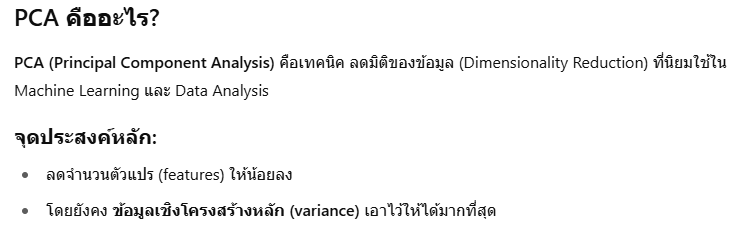

In [ ]:
import pandas as pd

# Assuming you used PCA like:
pca = PCA(n_components=2)
pca.fit(preprocessed_data)

# Show components
components_df = pd.DataFrame(
    pca.components_,
    columns=available_numerical_features,
    index=['PC1', 'PC2']
)

print(components_df.T.sort_values('PC1', ascending=False))  # Sort by PC1 importance
print(components_df.T.sort_values('PC2', ascending=False))  # Sort by PC2 importance


                        PC1       PC2
Rent_USD           0.527135 -0.084371
Insurance_USD      0.484458 -0.333982
Tuition_USD        0.460182  0.353721
Living_Cost_Index  0.456865 -0.354475
Visa_Fee_USD       0.258722  0.794082
                        PC1       PC2
Visa_Fee_USD       0.258722  0.794082
Tuition_USD        0.460182  0.353721
Rent_USD           0.527135 -0.084371
Insurance_USD      0.484458 -0.333982
Living_Cost_Index  0.456865 -0.354475


**Result**

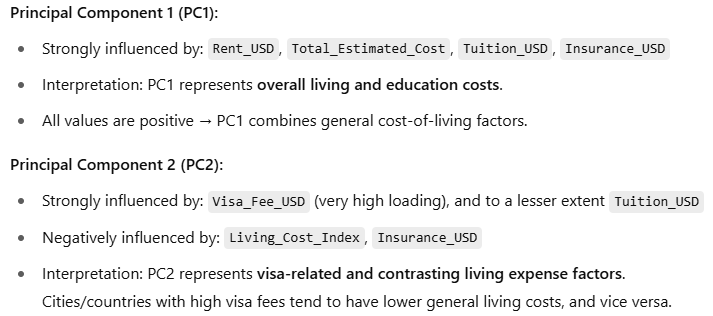

In [ ]:
import pandas as pd

# Assuming you used PCA like:
pca = PCA(n_components=2)
pca.fit(preprocessed_data)

# Show components
components_df = pd.DataFrame(
    pca.components_,
    columns=available_numerical_features,
    index=['PC1', 'PC2']
)

print(components_df.T.sort_values('PC1', ascending=False))  # Sort by PC1 importance
print(components_df.T.sort_values('PC2', ascending=False))  # Sort by PC2 importance


                        PC1       PC2
Rent_USD           0.527135 -0.084371
Insurance_USD      0.484458 -0.333982
Tuition_USD        0.460182  0.353721
Living_Cost_Index  0.456865 -0.354475
Visa_Fee_USD       0.258722  0.794082
                        PC1       PC2
Visa_Fee_USD       0.258722  0.794082
Tuition_USD        0.460182  0.353721
Rent_USD           0.527135 -0.084371
Insurance_USD      0.484458 -0.333982
Living_Cost_Index  0.456865 -0.354475


In [ ]:
def cal_stat(df_data):
    df_unique_country_cluster = df_data.drop_duplicates(subset=['City', 'Cluster']).reset_index(drop=True)

    # Select only numerical columns
    numerical_cols = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
                    'Visa_Fee_USD', 'Insurance_USD','Total_Estimated_Cost' ]

    # Group by Cluster and calculate stats
    cluster_stats = df_unique_country_cluster.groupby('Cluster')[numerical_cols].agg(['min', 'max', 'median', 'mean'])

    # Display the result
    country_per_cluster = df_unique_country_cluster.groupby('Cluster')['Country'].apply(set)
    country_per_cluster = country_per_cluster.apply(list)
    cluster_country_sets_list = country_per_cluster.tolist()
    return cluster_stats, cluster_country_sets_list


cluster_stats, cluster_country_sets_list = cal_stat(data_with_clusters_for_master_phd)

for num, data in enumerate(cluster_country_sets_list):
    print("cluster:", num, data)

cluster_stats

cluster: 0 ['UK', 'Australia']
cluster: 1 ['Bangladesh', 'Ukraine', 'Portugal', 'Colombia', 'El Salvador', 'Lebanon', 'Uzbekistan', 'Brazil', 'Romania', 'Poland', 'Turkey', 'Ghana', 'Russia', 'Peru', 'Cyprus', 'Tunisia', 'Malaysia', 'Egypt', 'China', 'Morocco', 'Serbia', 'Croatia', 'Slovenia', 'Indonesia', 'Bulgaria', 'India', 'Thailand', 'Iran', 'Dominican Republic', 'Ecuador', 'Algeria', 'Panama', 'Greece', 'Hungary', 'Mexico', 'Uruguay']
cluster: 2 ['Netherlands', 'Portugal', 'Japan', 'Austria', 'Italy', 'Bahrain', 'Lebanon', 'Luxembourg', 'Denmark', 'Germany', 'Cyprus', 'Singapore', 'Ireland', 'Saudi Arabia', 'Spain', 'France', 'South Korea', 'Belgium', 'Kuwait']
cluster: 3 ['USA']
cluster: 4 ['UAE', 'France', 'Netherlands', 'Singapore', 'Ireland', 'Canada', 'New Zealand']
cluster: 5 ['Switzerland', 'France']


Tuition_USD                               Living_Cost_Index         \
                min    max   median          mean               min    max   
Cluster                                                                      
0             27900  44900  35000.0  35050.000000              61.2   75.8   
1              1000  18000   3700.0   4530.263158              27.8   62.4   
2               400  20000   4450.0   5959.615385              52.4   83.2   
3             38200  56000  50500.0  49042.307692              67.8  100.0   
4             15600  38500  23500.0  24207.692308              55.5   81.1   
5              1420   4500   1460.0   1743.636364              84.2  116.5   

                          Rent_USD                            Visa_Fee_USD  \
        median       mean      min   max  median         mean          min   
Cluster                                                                      
0        66.55  67.323333      800  2000  1075.0  1158.333333          450   
1        44.00  44.989474      160   800   350.0   362.763158           40   
2        69.65  69.697115      500  1600   800.0   851.634615           75   
3        73.00  76.984615     1400  2500  1750.0  1850.000000          160   
4        64.50  66.135897      700  1900  1100.0  1148.717949           90   
5        88.60  93.736364     1300  2100  1700.0  1700.000000           88   

                                Insurance_USD                             \
         max median        mean           min   max  median         mean   
Cluster                                                                    
0        485  485.0  468.666667           650   800   800.0   730.000000   
1        200  105.0  110.592105           200   500   350.0   340.131579   
2        250  120.0  131.451923           400   850   750.0   714.230769   
3        160  160.0  160.000000          1500  1500  1500.0  1500.000000   
4        330  235.0  236.256410           600   900   600.0   703.076923   
5        140   88.0  103.181818           850  1200  1200.0  1168.181818   

        Total_Estimated_Cost                                     
                         min       max    median           mean  
Cluster                                                          
0                    41685.0  116485.0   62817.5   66908.666667  
1                     5700.0   36090.0   15620.0   16661.776316  
2                    17275.0   88990.0   28735.0   32106.355769  
3                    81360.0  199860.0  109660.0  122413.846154  
4                    34700.0   87735.0   53170.0   55535.487179  
5                    35240.0   92788.0   44748.0   49128.636364

In [ ]:
import pandas as pd

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Disable line wrapping
pd.set_option('display.max_colwidth', None) # Show full column width

# Then display your DataFrame
cluster_stats_rounded = cluster_stats.round(2)
display(cluster_stats_rounded)
  # or use df_stats in a Jupyter notebook to display as a table


Tuition_USD                           Living_Cost_Index                \
                min    max   median      mean               min    max median   
Cluster                                                                         
0             27900  44900  35000.0  35050.00              61.2   75.8  66.55   
1              1000  18000   3700.0   4530.26              27.8   62.4  44.00   
2               400  20000   4450.0   5959.62              52.4   83.2  69.65   
3             38200  56000  50500.0  49042.31              67.8  100.0  73.00   
4             15600  38500  23500.0  24207.69              55.5   81.1  64.50   
5              1420   4500   1460.0   1743.64              84.2  116.5  88.60   

               Rent_USD                        Visa_Fee_USD              \
          mean      min   max  median     mean          min  max median   
Cluster                                                                   
0        67.32      800  2000  1075.0  1158.33          450  485  485.0   
1        44.99      160   800   350.0   362.76           40  200  105.0   
2        69.70      500  1600   800.0   851.63           75  250  120.0   
3        76.98     1400  2500  1750.0  1850.00          160  160  160.0   
4        66.14      700  1900  1100.0  1148.72           90  330  235.0   
5        93.74     1300  2100  1700.0  1700.00           88  140   88.0   

                Insurance_USD                        Total_Estimated_Cost  \
           mean           min   max  median     mean                  min   
Cluster                                                                     
0        468.67           650   800   800.0   730.00              41685.0   
1        110.59           200   500   350.0   340.13               5700.0   
2        131.45           400   850   750.0   714.23              17275.0   
3        160.00          1500  1500  1500.0  1500.00              81360.0   
4        236.26           600   900   600.0   703.08              34700.0   
5        103.18           850  1200  1200.0  1168.18              35240.0   

                                        
              max    median       mean  
Cluster                                 
0        116485.0   62817.5   66908.67  
1         36090.0   15620.0   16661.78  
2         88990.0   28735.0   32106.36  
3        199860.0  109660.0  122413.85  
4         87735.0   53170.0   55535.49  
5         92788.0   44748.0   49128.64

cluster: 0 ['UK', 'Australia']
cluster: 1 ['Bangladesh', 'Ukraine', 'Portugal', 'Colombia', 'El Salvador', 'Lebanon', 'Uzbekistan', 'Brazil', 'Romania', 'Poland', 'Turkey', 'Ghana', 'Russia', 'Peru', 'Cyprus', 'Tunisia', 'Malaysia', 'Egypt', 'China', 'Morocco', 'Serbia', 'Croatia', 'Slovenia', 'Indonesia', 'Bulgaria', 'India', 'Thailand', 'Iran', 'Dominican Republic', 'Ecuador', 'Algeria', 'Panama', 'Greece', 'Hungary', 'Mexico', 'Uruguay']
cluster: 2 ['Netherlands', 'Portugal', 'Japan', 'Austria', 'Italy', 'Bahrain', 'Lebanon', 'Luxembourg', 'Denmark', 'Germany', 'Cyprus', 'Singapore', 'Ireland', 'Saudi Arabia', 'Spain', 'France', 'South Korea', 'Belgium', 'Kuwait']
cluster: 3 ['USA']
cluster: 4 ['UAE', 'France', 'Netherlands', 'Singapore', 'Ireland', 'Canada', 'New Zealand']
cluster: 5 ['Switzerland', 'France']


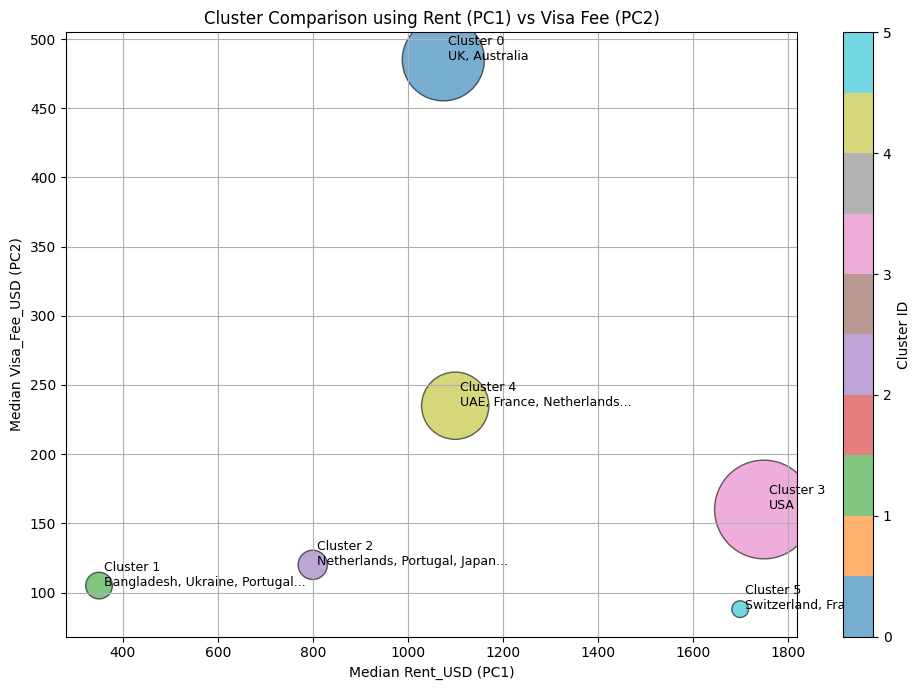

In [ ]:
def plot_cluster_bubble_from_stat(df_data, size_column='Tuition_USD'):
    """
    Generate a bubble chart from SOM/KMeans cluster stats.

    Args:
        df_data (DataFrame): The cleaned DataFrame with 'Cluster', 'City', and numerical columns.
        size_column (str): Which column to use for bubble size. Default is 'Tuition_USD'.

    Returns:
        matplotlib.figure.Figure: The bubble chart figure.
    """
    # Step 1: Prepare statistics
    df_unique_country_cluster = df_data.drop_duplicates(subset=['City', 'Cluster']).reset_index(drop=True)

    numerical_cols = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
                      'Visa_Fee_USD', 'Insurance_USD']

    cluster_stats = df_unique_country_cluster.groupby('Cluster')[numerical_cols].agg(['min', 'max', 'median', 'mean'])

    country_per_cluster = df_unique_country_cluster.groupby('Cluster')['Country'].apply(set).apply(list)
    cluster_country_sets_list = country_per_cluster.tolist()

    # Step 2: Extract median for plotting
    cluster_stats_med = cluster_stats.xs('median', axis=1, level=1)
    x = cluster_stats_med['Rent_USD']
    y = cluster_stats_med['Visa_Fee_USD']
    sizes = cluster_stats_med[size_column]

    # Step 3: Plot bubble chart
    fig, ax = plt.subplots(figsize=(10, 7))
    scatter = ax.scatter(x, y, s=sizes / 10, alpha=0.6, c=range(len(x)), cmap='tab10', edgecolors='black')

    for i, countries in enumerate(cluster_country_sets_list):
        label = f"Cluster {i}\n" + ', '.join(countries[:3]) + ('...' if len(countries) > 3 else '')
        ax.text(x[i] + 10, y[i], label, fontsize=9)

    ax.set_title("Cluster Comparison using Rent (PC1) vs Visa Fee (PC2)")
    ax.set_xlabel("Median Rent_USD (PC1)")
    ax.set_ylabel("Median Visa_Fee_USD (PC2)")
    ax.grid(True)

    fig.colorbar(scatter, ax=ax, label="Cluster ID")
    fig.tight_layout()
    return fig

cluster_stats, cluster_country_sets_list = cal_stat(data_with_clusters_for_master_phd)

for num, data in enumerate(cluster_country_sets_list):
    print("cluster:", num, data)

cluster_stats
fig_pca_kmean_master = plot_cluster_bubble_from_stat(data_with_clusters_for_master_phd)
fig_pca_kmean_master.savefig("cluster_bubble_kmean.png", dpi=300)


In [ ]:
import pandas as pd

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Disable line wrapping
pd.set_option('display.max_colwidth', None) # Show full column width

# Then display your DataFrame
cluster_stats_rounded = cluster_stats.round(2)
display(cluster_stats_rounded)
  # or use df_stats in a Jupyter notebook to display as a table


Tuition_USD                           Living_Cost_Index                \
                min    max   median      mean               min    max median   
Cluster                                                                         
0             27900  44900  35000.0  35050.00              61.2   75.8  66.55   
1              1000  18000   3700.0   4530.26              27.8   62.4  44.00   
2               400  20000   4450.0   5959.62              52.4   83.2  69.65   
3             38200  56000  50500.0  49042.31              67.8  100.0  73.00   
4             15600  38500  23500.0  24207.69              55.5   81.1  64.50   
5              1420   4500   1460.0   1743.64              84.2  116.5  88.60   

               Rent_USD                        Visa_Fee_USD              \
          mean      min   max  median     mean          min  max median   
Cluster                                                                   
0        67.32      800  2000  1075.0  1158.33          450  485  485.0   
1        44.99      160   800   350.0   362.76           40  200  105.0   
2        69.70      500  1600   800.0   851.63           75  250  120.0   
3        76.98     1400  2500  1750.0  1850.00          160  160  160.0   
4        66.14      700  1900  1100.0  1148.72           90  330  235.0   
5        93.74     1300  2100  1700.0  1700.00           88  140   88.0   

                Insurance_USD                        Total_Estimated_Cost  \
           mean           min   max  median     mean                  min   
Cluster                                                                     
0        468.67           650   800   800.0   730.00              41685.0   
1        110.59           200   500   350.0   340.13               5700.0   
2        131.45           400   850   750.0   714.23              17275.0   
3        160.00          1500  1500  1500.0  1500.00              81360.0   
4        236.26           600   900   600.0   703.08              34700.0   
5        103.18           850  1200  1200.0  1168.18              35240.0   

                                        
              max    median       mean  
Cluster                                 
0        116485.0   62817.5   66908.67  
1         36090.0   15620.0   16661.78  
2         88990.0   28735.0   32106.36  
3        199860.0  109660.0  122413.85  
4         87735.0   53170.0   55535.49  
5         92788.0   44748.0   49128.64

In [ ]:
# import matplotlib.pyplot as plt

# def plot_cluster_bubble_from_stat(df_data, size_column='Tuition_USD'):
#     """
#     Generate a bubble chart from SOM/KMeans cluster stats.

#     Args:
#         df_data (DataFrame): The cleaned DataFrame with 'Cluster', 'City', and numerical columns.
#         size_column (str): Which column to use for bubble size. Default is 'Tuition_USD'.

#     Returns:
#         matplotlib.figure.Figure: The bubble chart figure.
#     """
#     # Step 1: Prepare statistics
#     cluster_stats, cluster_country_sets_list = cal_stat(df_data)

#     # Step 2: Extract median values
#     try:
#         cluster_stats_med = cluster_stats.xs('median', axis=1, level=1)
#     except KeyError:
#         print("❌ Error: 'median' level not found in MultiIndex columns.")
#         return None

#     # Step 3: Validate size_column
#     if size_column not in cluster_stats_med.columns:
#         print(f"⚠️ Warning: '{size_column}' not found. Defaulting to 'Tuition_USD'.")
#         size_column = 'Tuition_USD'
#         if size_column not in cluster_stats_med.columns:
#             print("❌ Error: 'Tuition_USD' not found in median stats. Cannot plot.")
#             return None

#     # Step 4: Prepare data for plotting
#     x = cluster_stats_med['Rent_USD']
#     y = cluster_stats_med['Visa_Fee_USD']
#     sizes = cluster_stats_med[size_column]
#     cluster_labels = cluster_stats_med.index.tolist()

#     # Step 5: Create bubble chart
#     fig, ax = plt.subplots(figsize=(10, 7))

#     scaled_sizes = sizes / sizes.max() * 1000  # scale for visual effect
#     scatter = ax.scatter(x, y, s=scaled_sizes, c=cluster_labels, cmap='tab10', alpha=0.7, edgecolors='black')

#     # Step 6: Annotate each cluster
#     for i, cluster_label in enumerate(cluster_labels):
#         countries = cluster_country_sets_list[i]
#         label = f"C{cluster_label}: " + ', '.join(countries[:2]) + ('...' if len(countries) > 2 else '')
#         ax.text(x.iloc[i] + 20, y.iloc[i] + 10, label, fontsize=8, va='bottom', ha='left')

#     ax.set_title("Cluster Comparison using Rent (Median) vs Visa Fee (Median)", fontsize=14)
#     ax.set_xlabel("Median Rent_USD", fontsize=12)
#     ax.set_ylabel("Median Visa_Fee_USD", fontsize=12)
#     ax.grid(True)

#     # Optional: Legend using cluster color mapping
#     legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc='upper right')
#     ax.add_artist(legend1)

#     plt.tight_layout()
#     return fig  # ✅ Return the figure so you can save or show later
# #Use the correct variable name data_with_clusters_for_master_phd ---
# # Recalculate stats here specifically for the plotting function
# cluster_stats_for_plot, cluster_country_sets_list_for_plot = cal_stat(data_with_clusters_for_master_phd)

# #Pass data_with_clusters_for_master_phd to the plotting function ---
# fig_pca_kmean_master = plot_cluster_bubble_from_stat(data_with_clusters_for_master_phd, size_column='Tuition_USD')

# if fig_pca_kmean_master is not None:
#     fig_pca_kmean_master.savefig("cluster_bubble_kmean.png", dpi=300)
# else:
#     print("Bubble plot could not be generated.")

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import io

def fig_to_image(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    return Image.open(buf)

def compare_figures_as_images(fig1, fig2):
    img1 = fig_to_image(fig1)
    img2 = fig_to_image(fig2)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    axs[0].imshow(img1)
    axs[0].axis('off')
    axs[0].set_title("Clustering")

    axs[1].imshow(img2)
    axs[1].axis('off')
    axs[1].set_title("Cluster Bubble (Rent vs Visa Fee)")

    plt.tight_layout()
    plt.show()


<class 'matplotlib.figure.Figure'>
<class 'matplotlib.figure.Figure'>


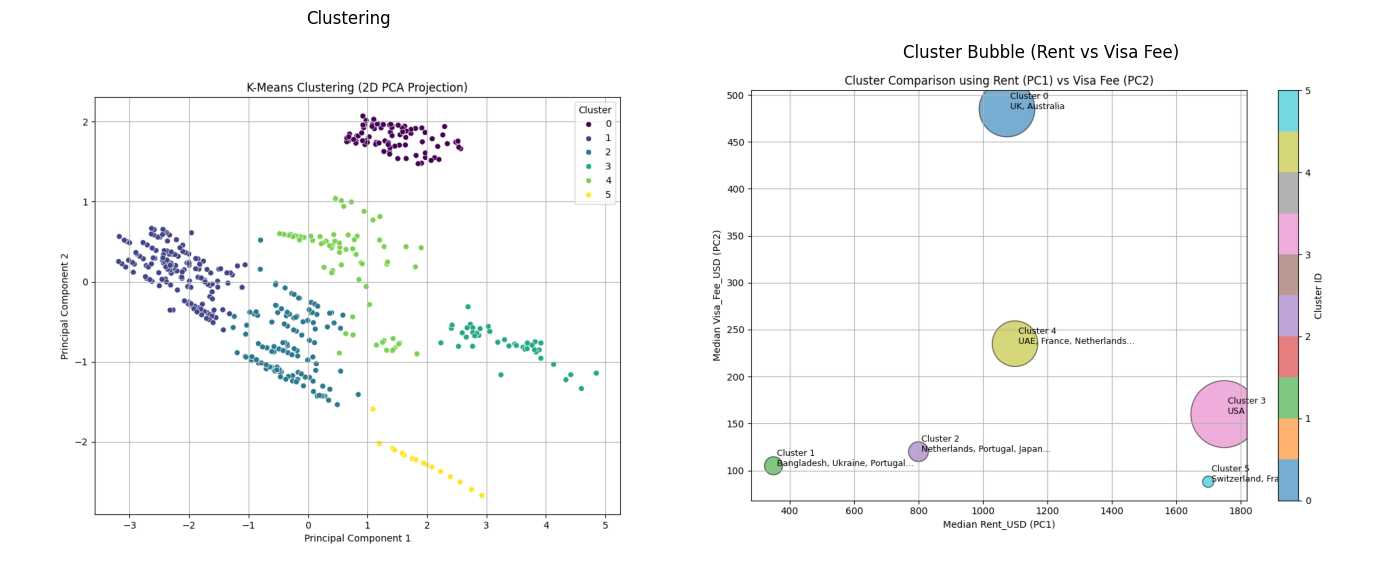

In [ ]:
print(type(kmeans_master_fig))
print(type(fig_pca_kmean_master))

# --- Comparison ---
# Ensure both figure variables are not None before comparing
if kmeans_master_fig is not None and fig_pca_kmean_master is not None:
    compare_figures_as_images(kmeans_master_fig, fig_pca_kmean_master)
else:
    print("Cannot compare figures: One or both figures could not be generated.")

#3.Clustering Master using SOM

###3.1 Install MINI SOM

In [ ]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=9ca589fd1818731e6ab33146a5a73ab77e3009ebc5d9a1886e9121b1d9653539
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [ ]:
from minisom import MiniSom
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class SOMClustering:
    def __init__(self, x=7, y=7, sigma=0.8, learning_rate=0.5, random_seed=42):
        """
        Initializes an object for performing Self-Organizing Map (SOM) clustering.

        Parameters:
        - x, y: Dimensions of the SOM grid (width x height)
        - sigma: Controls the radius of the neighborhood function
        - learning_rate: The learning rate for weight updates during training
        - random_seed: Seed value for reproducible randomness
        """
        self.som = None
        self.x = x
        self.y = y
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.random_seed = random_seed
        self.pca = PCA(n_components=2)
        self.win_map = None
        self.cluster_map = None

    def fit_predict(self, data):
        """
        Train SOM and assign clusters.

        Returns:
            cluster_labels: Cluster labels assigned to data points.
        """
        input_len = data.shape[1]
        self.som = MiniSom(self.x, self.y, input_len, sigma=self.sigma,
                           learning_rate=self.learning_rate, random_seed=self.random_seed)
        self.som.random_weights_init(data)
        self.som.train_random(data, num_iteration=500)

        # Map each data point to a winning neuron (x, y)
        win_locations = np.array([self.som.winner(x) for x in data])
        win_labels = [f"{x}-{y}" for x, y in win_locations]

        # Encode neuron coordinates into cluster labels
        _, unique_indices = np.unique(win_labels, return_inverse=True)
        return unique_indices

    def transform_pca(self, data):
        return self.pca.fit_transform(data)

    def visualize_clusters(self, data_pca, cluster_labels):
        """
        Visualizes the clusters on PCA-transformed data and returns the matplotlib figure.

        Args:
            data_pca (array-like): PCA-reduced 2D data.
            cluster_labels (array-like): Cluster labels for each point.

        Returns:
            matplotlib.figure.Figure: The figure object containing the plot.
        """
        df = pd.DataFrame(data_pca, columns=["PC1", "PC2"])
        df["Cluster"] = cluster_labels

        fig, ax = plt.subplots(figsize=(10, 8))
        sns.scatterplot(data=df, x="PC1", y="PC2", hue="Cluster",
                        palette="Set2", legend="full", ax=ax)

        ax.set_title("SOM Clustering (2D PCA Projection)")
        ax.set_xlabel("Principal Component 1")
        ax.set_ylabel("Principal Component 2")
        ax.grid(True)
        fig.tight_layout()

        return fig

    def analyze_clusters(self, df_data, cluster_labels, available_numerical_features):
        df_data["Cluster"] = cluster_labels
        print("\nAnalyzing the characteristics of each cluster:")
        print(df_data.groupby("Cluster")[available_numerical_features].mean())

        for cluster in np.unique(cluster_labels):
            print(f"\nData points in Cluster {cluster}:")
            print(df_data[df_data["Cluster"] == cluster].to_string())
        return df_data

    def plot_u_matrix(self):
        """
        Visualizes the U-Matrix (Unified Distance Matrix) of the trained SOM.
        """
        if self.som is None:
            raise ValueError("SOM must be trained before plotting the U-Matrix.")

        u_matrix = self.som.distance_map()  # U-Matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(u_matrix.T, cmap='bone_r', origin='lower')
        plt.title("SOM U-Matrix (Neuron Grid)", fontsize=14)
        plt.xlabel("Neuron X")
        plt.ylabel("Neuron Y")
        plt.colorbar(label="Average distance to neighbors")
        plt.grid(False)
        plt.tight_layout()
        plt.show()


In [ ]:
df_master_phd

Country               City  \
0                   USA          Cambridge   
1                    UK             London   
2                Canada            Toronto   
3             Australia          Melbourne   
4               Germany             Munich   
5                 Japan              Tokyo   
6           Netherlands          Amsterdam   
7             Singapore          Singapore   
8                France              Paris   
9           Switzerland             Zurich   
10                China            Beijing   
11          South Korea              Seoul   
12              Ireland             Dublin   
13                  USA           Stanford   
14                  USA             Boston   
15                   UK             Oxford   
16                   UK          Cambridge   
17              Germany         Heidelberg   
18          Switzerland              Basel   
19          Netherlands              Delft   
20            Singapore          Singapore   
21               Canada           Waterloo   
22            Australia           Canberra   
23                  USA            Seattle   
24               Canada           Edmonton   
25                   UK            Glasgow   
26                India          Bangalore   
27               Poland             Warsaw   
28          South Korea            Daejeon   
29                Japan              Kyoto   
30                Japan             Sendai   
31                Japan            Sapporo   
32                Japan              Tokyo   
33                Japan               Kobe   
34                Japan          Hiroshima   
35            Australia              Perth   
36            Australia             Hobart   
37            Australia         Wollongong   
38            Australia         Townsville   
39            Australia           Armidale   
40              Germany            Dresden   
41              Germany            Hamburg   
42              Germany          Karlsruhe   
43              Germany       Braunschweig   
44              Germany           Hannover   
45              Germany           Freiburg   
46                  USA       Philadelphia   
47                  USA            Chicago   
48                  USA          Baltimore   
49                  USA             Durham   
50                  USA            Madison   
51                  USA            Boulder   
52                  USA              Davis   
53                   UK             London   
54                   UK            Warwick   
55                   UK          Sheffield   
56                   UK        Southampton   
57                   UK            Cardiff   
58                   UK          Newcastle   
59               Canada          London ON   
60               Canada            Halifax   
61               Canada        Quebec City   
62               Canada         St. John's   
63               Canada          Saskatoon   
64               Canada         Sherbrooke   
65                  USA         Pittsburgh   
66                  USA   Urbana-Champaign   
67               Russia             Moscow   
68               Greece             Athens   
69                  USA           New York   
70                  USA             Ithaca   
71                China           Shenzhen   
72         Saudi Arabia             Riyadh   
73          Netherlands          Eindhoven   
74          Netherlands          Groningen   
75          Netherlands           Nijmegen   
76          Netherlands            Utrecht   
77          Netherlands         Wageningen   
78          Netherlands          Amsterdam   
79            Singapore          Singapore   
80            Singapore          Singapore   
81            Singapore          Singapore   
82            Singapore          Singapore   
83            Singapore          Singapore   
84            Singapore          Singapore   
85               France              Paris   
86            

###3.2 processing som


Analyzing the characteristics of each cluster:
          Tuition_USD  Living_Cost_Index     Rent_USD  Visa_Fee_USD  \
Cluster                                                               
0        26627.777778          65.077778  1122.222222    250.555556   
1        34708.791209          68.217582  1302.197802    462.692308   
2        51202.000000          78.496000  1928.000000    160.000000   
3         4438.157895          44.615789   365.131579    110.921053   
4         5993.525180          69.551079   817.194245    125.748201   
5        13836.818182          87.822727  1520.454545    113.431818   

         Insurance_USD  
Cluster                 
0           686.111111  
1           704.395604  
2          1500.000000  
3           337.171053  
4           715.755396  
5           929.772727  

Data points in Cluster 0:
         Country            City                      University                  Program   Level  Duration_Years  Tuition_USD  Living_Cost_Index  Rent_USD 

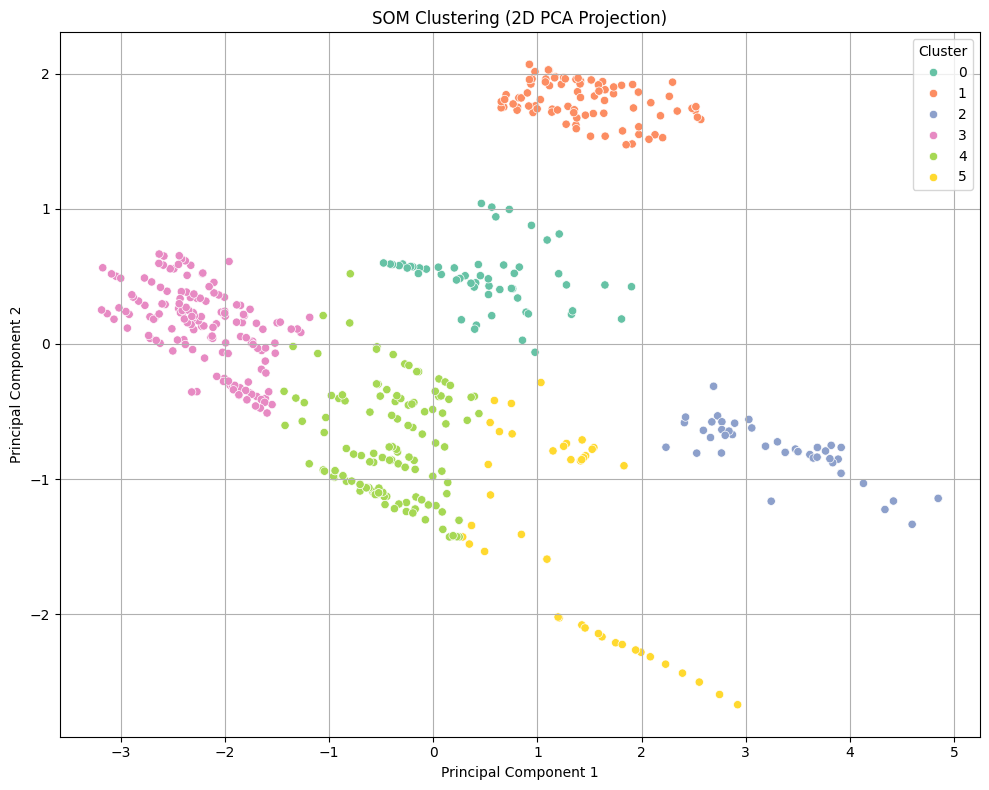

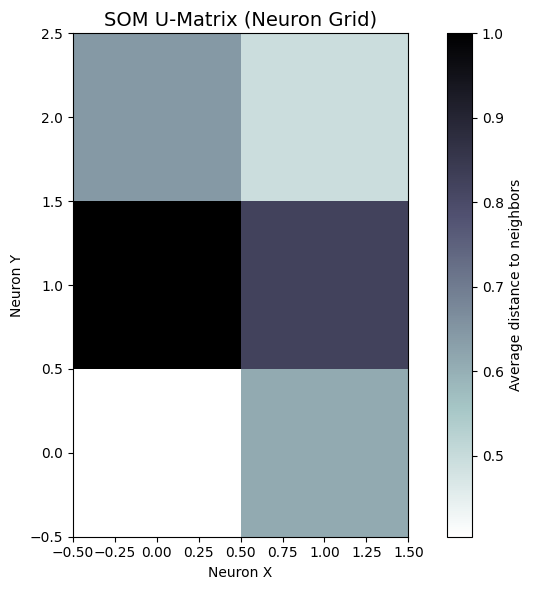

In [ ]:
# Instantiate and run SOM clustering
# som_clustering = SOMClustering(x=3, y=2)  # 6 neurons

som_clustering = SOMClustering(x=2, y=3, sigma=0.8, learning_rate=0.5, random_seed=424)
  # Change grid size as needed
som_clusters = som_clustering.fit_predict(preprocessed_data)

# Visualize results
data_pca = som_clustering.transform_pca(preprocessed_data)
fig_som = som_clustering.visualize_clusters(data_pca, som_clusters)

# Analyze clusters
df_som_data = som_clustering.analyze_clusters(df_master_phd, som_clusters, available_numerical_features)
# After training
som_clustering.plot_u_matrix()


###3.3 stat analysis

In [ ]:
def cal_stat(df_data):
    df_unique_country_cluster = df_data.drop_duplicates(subset=['City', 'Cluster']).reset_index(drop=True)

    # Select only numerical columns (optional: filter if needed)
    numerical_cols = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
                    'Visa_Fee_USD', 'Insurance_USD']

    # Group by Cluster and calculate stats
    cluster_stats = df_unique_country_cluster.groupby('Cluster')[numerical_cols].agg(['min', 'max', 'median', 'mean'])

    # Display the result
    cluster_stats


    country_per_cluster = df_unique_country_cluster.groupby('Cluster')['Country'].apply(set)
    country_per_cluster = country_per_cluster.apply(list)
    cluster_country_sets_list = country_per_cluster.tolist()
    return cluster_stats, cluster_country_sets_list

cluster_stats, cluster_country_sets_list = cal_stat(df_som_data)

for num, data in enumerate(cluster_country_sets_list):
    print("cluster:", num, data)

cluster_stats

cluster: 0 ['Canada', 'New Zealand', 'UAE']
cluster: 1 ['UK', 'Australia']
cluster: 2 ['USA']
cluster: 3 ['Bangladesh', 'Ukraine', 'Portugal', 'Colombia', 'El Salvador', 'Lebanon', 'Uzbekistan', 'Brazil', 'Romania', 'Poland', 'Turkey', 'Ghana', 'Russia', 'Peru', 'Tunisia', 'Malaysia', 'Egypt', 'China', 'Morocco', 'Serbia', 'Croatia', 'Slovenia', 'Indonesia', 'Bulgaria', 'India', 'Thailand', 'Iran', 'Dominican Republic', 'Ecuador', 'Algeria', 'Panama', 'Greece', 'Hungary', 'Mexico', 'Uruguay']
cluster: 4 ['Netherlands', 'Portugal', 'Japan', 'Austria', 'Italy', 'Bahrain', 'Lebanon', 'Luxembourg', 'Denmark', 'Germany', 'Russia', 'Cyprus', 'Ireland', 'China', 'Slovenia', 'Saudi Arabia', 'Spain', 'France', 'South Korea', 'Belgium', 'Kuwait']
cluster: 5 ['France', 'Switzerland', 'Netherlands', 'South Korea', 'Japan', 'Ireland', 'Singapore', 'Luxembourg', 'Denmark']


Tuition_USD                               Living_Cost_Index         \
                min    max   median          mean               min    max   
Cluster                                                                      
0             19000  38500  23650.0  24470.588235              55.5   79.5   
1             27900  44900  35000.0  35050.000000              61.2   75.8   
2             38200  56000  50500.0  49042.307692              67.8  100.0   
3              1000  16000   3500.0   4366.438356              27.8   58.9   
4               400  20000   4500.0   6094.230769              52.4   79.5   
5               400  35000   1500.0   7776.363636              72.9  116.5   

                          Rent_USD                            Visa_Fee_USD  \
        median       mean      min   max  median         mean          min   
Cluster                                                                      
0        64.00  64.767647      700  1900  1050.0  1088.235294          235   
1        66.55  67.323333      800  2000  1075.0  1158.333333          450   
2        73.00  76.984615     1400  2500  1750.0  1850.000000          160   
3        43.65  44.414384      160   800   350.0   355.342466           40   
4        68.70  68.449038      430  1400   800.0   801.250000           75   
5        83.70  85.804545      950  2100  1500.0  1529.545455           88   

                                Insurance_USD                             
         max median        mean           min   max  median         mean  
Cluster                                                                   
0        330  235.0  251.323529           600   900   600.0   701.470588  
1        485  485.0  468.666667           650   800   800.0   730.000000  
2        160  160.0  160.000000          1500  1500  1500.0  1500.000000  
3        200  105.0  110.136986           200   500   350.0   335.273973  
4        250  120.0  132.028846           400   850   720.0   696.730769  
5        220   99.5  117.954545           600  1200   825.0   949.545455

In [ ]:
cluster_stats, cluster_country_sets_list = cal_stat(df_som_data)

for num, data in enumerate(cluster_country_sets_list):
    print("cluster:", num, data)

cluster_stats


cluster: 0 ['Canada', 'New Zealand', 'UAE']
cluster: 1 ['UK', 'Australia']
cluster: 2 ['USA']
cluster: 3 ['Bangladesh', 'Ukraine', 'Portugal', 'Colombia', 'El Salvador', 'Lebanon', 'Uzbekistan', 'Brazil', 'Romania', 'Poland', 'Turkey', 'Ghana', 'Russia', 'Peru', 'Tunisia', 'Malaysia', 'Egypt', 'China', 'Morocco', 'Serbia', 'Croatia', 'Slovenia', 'Indonesia', 'Bulgaria', 'India', 'Thailand', 'Iran', 'Dominican Republic', 'Ecuador', 'Algeria', 'Panama', 'Greece', 'Hungary', 'Mexico', 'Uruguay']
cluster: 4 ['Netherlands', 'Portugal', 'Japan', 'Austria', 'Italy', 'Bahrain', 'Lebanon', 'Luxembourg', 'Denmark', 'Germany', 'Russia', 'Cyprus', 'Ireland', 'China', 'Slovenia', 'Saudi Arabia', 'Spain', 'France', 'South Korea', 'Belgium', 'Kuwait']
cluster: 5 ['France', 'Switzerland', 'Netherlands', 'South Korea', 'Japan', 'Ireland', 'Singapore', 'Luxembourg', 'Denmark']


Tuition_USD                               Living_Cost_Index         \
                min    max   median          mean               min    max   
Cluster                                                                      
0             19000  38500  23650.0  24470.588235              55.5   79.5   
1             27900  44900  35000.0  35050.000000              61.2   75.8   
2             38200  56000  50500.0  49042.307692              67.8  100.0   
3              1000  16000   3500.0   4366.438356              27.8   58.9   
4               400  20000   4500.0   6094.230769              52.4   79.5   
5               400  35000   1500.0   7776.363636              72.9  116.5   

                          Rent_USD                            Visa_Fee_USD  \
        median       mean      min   max  median         mean          min   
Cluster                                                                      
0        64.00  64.767647      700  1900  1050.0  1088.235294          235   
1        66.55  67.323333      800  2000  1075.0  1158.333333          450   
2        73.00  76.984615     1400  2500  1750.0  1850.000000          160   
3        43.65  44.414384      160   800   350.0   355.342466           40   
4        68.70  68.449038      430  1400   800.0   801.250000           75   
5        83.70  85.804545      950  2100  1500.0  1529.545455           88   

                                Insurance_USD                             
         max median        mean           min   max  median         mean  
Cluster                                                                   
0        330  235.0  251.323529           600   900   600.0   701.470588  
1        485  485.0  468.666667           650   800   800.0   730.000000  
2        160  160.0  160.000000          1500  1500  1500.0  1500.000000  
3        200  105.0  110.136986           200   500   350.0   335.273973  
4        250  120.0  132.028846           400   850   720.0   696.730769  
5        220   99.5  117.954545           600  1200   825.0   949.545455

###3.3 stat visualization

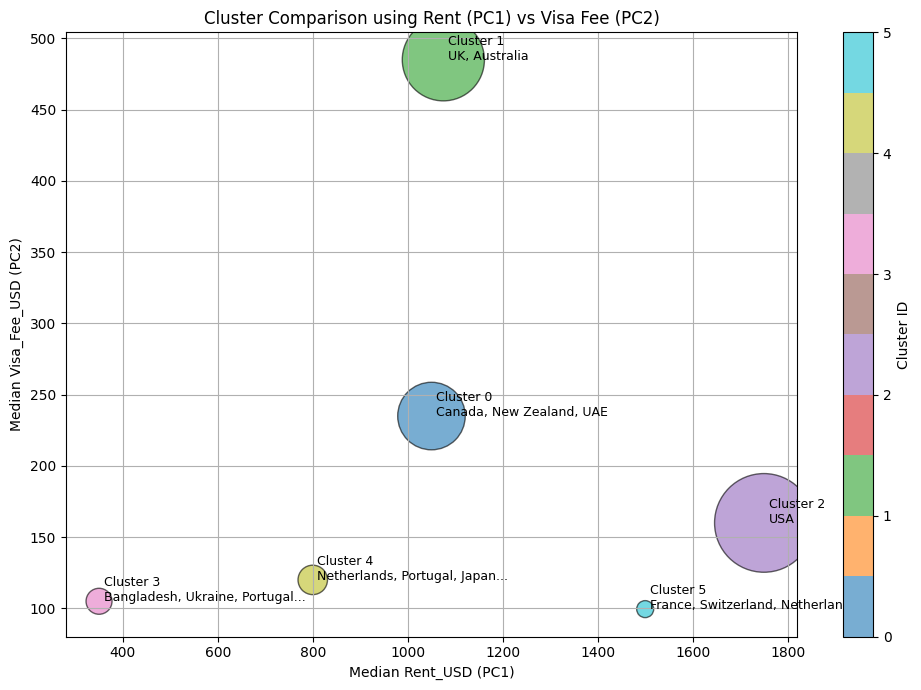

In [ ]:
import matplotlib.pyplot as plt

def plot_cluster_bubble_from_stat(df_data, size_column='Tuition_USD'):
    """
    Generate a bubble chart from SOM/KMeans cluster stats.

    Args:
        df_data (DataFrame): The cleaned DataFrame with 'Cluster', 'City', and numerical columns.
        size_column (str): Which column to use for bubble size. Default is 'Tuition_USD'.

    Returns:
        matplotlib.figure.Figure: The bubble chart figure.
    """
    # Step 1: Prepare statistics
    df_unique_country_cluster = df_data.drop_duplicates(subset=['City', 'Cluster']).reset_index(drop=True)

    numerical_cols = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD',
                      'Visa_Fee_USD', 'Insurance_USD']

    cluster_stats = df_unique_country_cluster.groupby('Cluster')[numerical_cols].agg(['min', 'max', 'median', 'mean'])

    country_per_cluster = df_unique_country_cluster.groupby('Cluster')['Country'].apply(set).apply(list)
    cluster_country_sets_list = country_per_cluster.tolist()

    # Step 2: Extract median for plotting
    cluster_stats_med = cluster_stats.xs('median', axis=1, level=1)
    x = cluster_stats_med['Rent_USD']
    y = cluster_stats_med['Visa_Fee_USD']
    sizes = cluster_stats_med[size_column]

    # Step 3: Plot bubble chart
    fig, ax = plt.subplots(figsize=(10, 7))
    scatter = ax.scatter(x, y, s=sizes / 10, alpha=0.6, c=range(len(x)), cmap='tab10', edgecolors='black')

    for i, countries in enumerate(cluster_country_sets_list):
        label = f"Cluster {i}\n" + ', '.join(countries[:3]) + ('...' if len(countries) > 3 else '')
        ax.text(x[i] + 10, y[i], label, fontsize=9)

    ax.set_title("Cluster Comparison using Rent (PC1) vs Visa Fee (PC2)")
    ax.set_xlabel("Median Rent_USD (PC1)")
    ax.set_ylabel("Median Visa_Fee_USD (PC2)")
    ax.grid(True)

    fig.colorbar(scatter, ax=ax, label="Cluster ID")
    fig.tight_layout()
    return fig
fig_pca_som = plot_cluster_bubble_from_stat(df_som_data)
fig_pca_som.savefig("cluster_bubble_som.png", dpi=300)


###3.4 comapre som vs  bubble

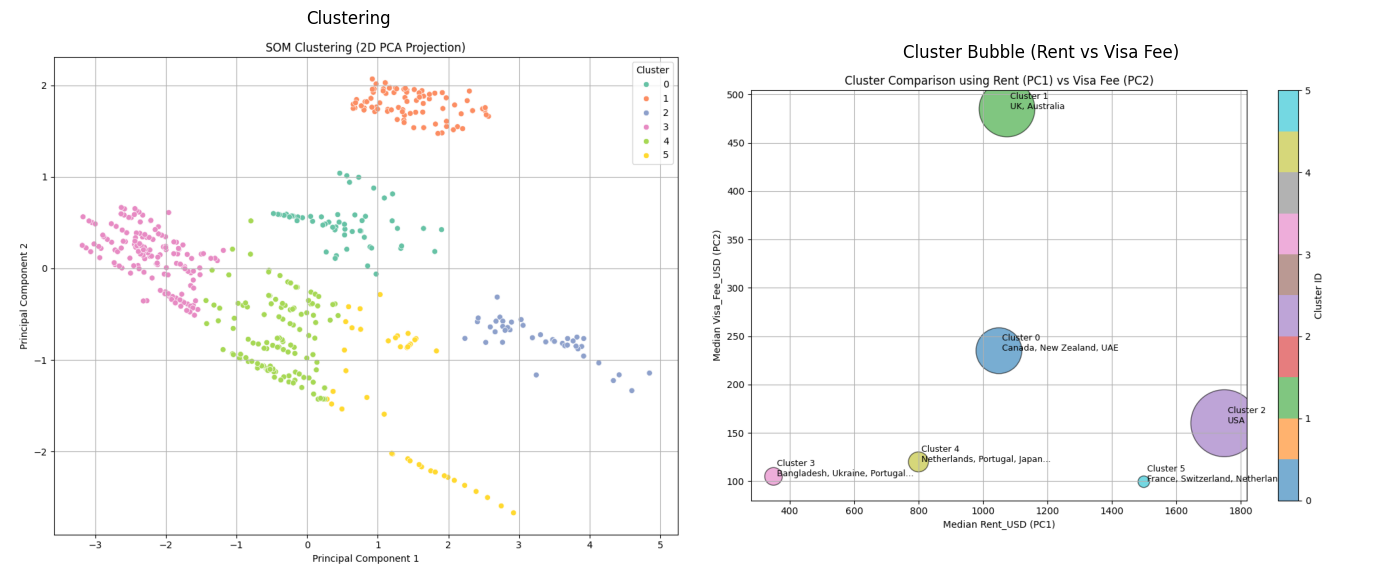

In [ ]:
compare_figures_as_images(fig_som, fig_pca_som)

#4.Compare model cluster kmeans vs som

###4.1 image compare

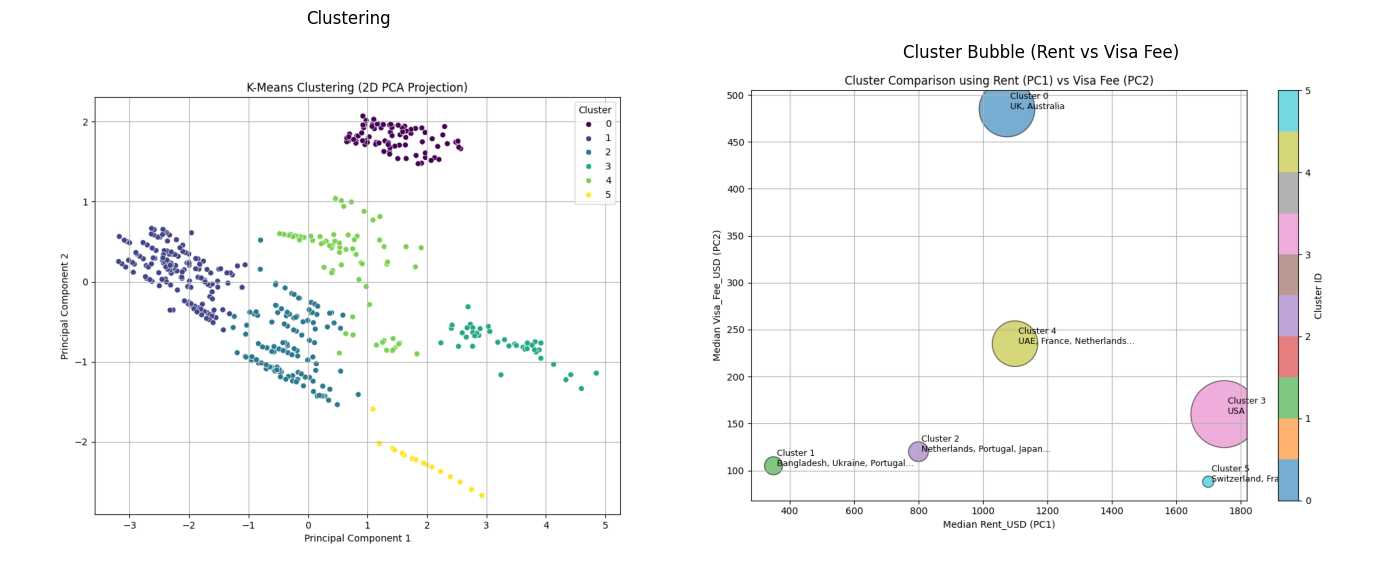

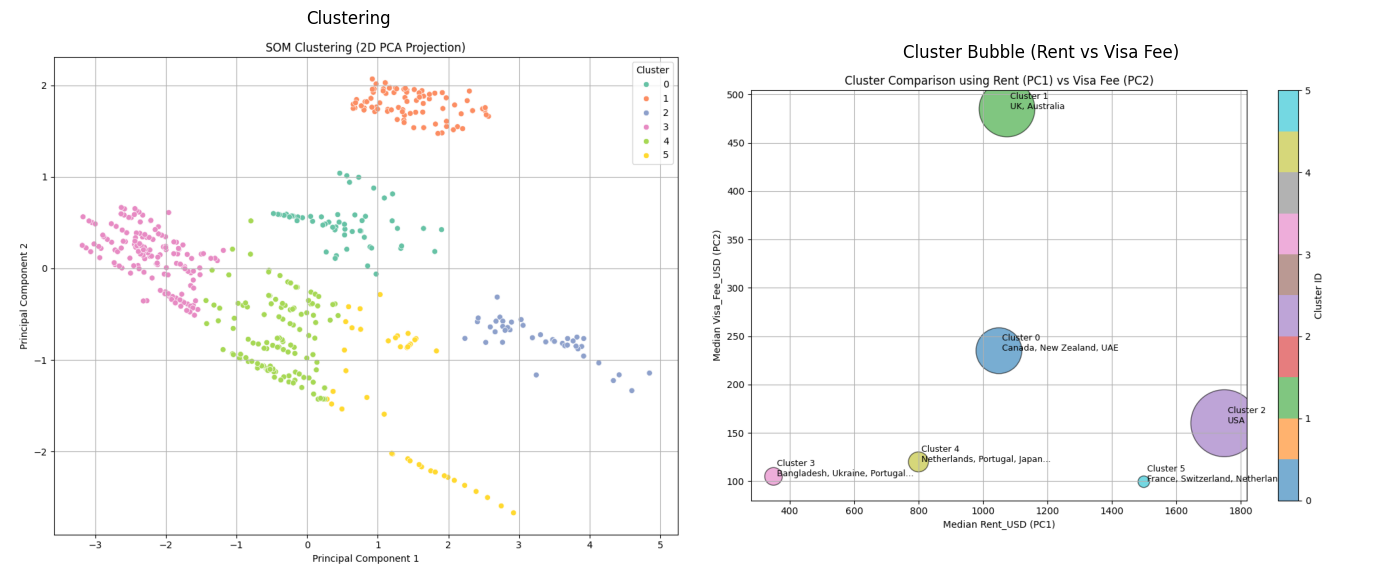

In [ ]:
compare_figures_as_images(kmeans_master_fig, fig_pca_kmean_master)
compare_figures_as_images(fig_som, fig_pca_som)

In [ ]:
import urllib.request
import zipfile
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score

###4.2 Silhouette Score compare

ref: https://medium.com/espressofx-notebook/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%AB%E0%B8%B2%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99-k-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%80%E0%B8%AB%E0%B8%A1%E0%B8%B2%E0%B8%B0%E0%B8%AA%E0%B8%A1%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%AA%E0%B8%B8%E0%B8%94%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B8%A7%E0%B8%B4%E0%B8%98%E0%B8%B5-silhouette-b367fdae24d4

ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
# original input data
data = preprocessed_data

# clustering labels from both models
kmeans_labels = kmeans_clustering.clusters
som_labels = som_clustering.fit_predict(data)

from sklearn.metrics import silhouette_score

# evaluate
score_kmeans = silhouette_score(data, kmeans_labels)
score_som = silhouette_score(data, som_labels)

print(f"KMeans Silhouette Score: {score_kmeans:.4f}")
print(f"SOM Silhouette Score: {score_som:.4f}")


KMeans Silhouette Score: 0.5176
SOM Silhouette Score: 0.4912


###4.3 Silhouette distribution compare

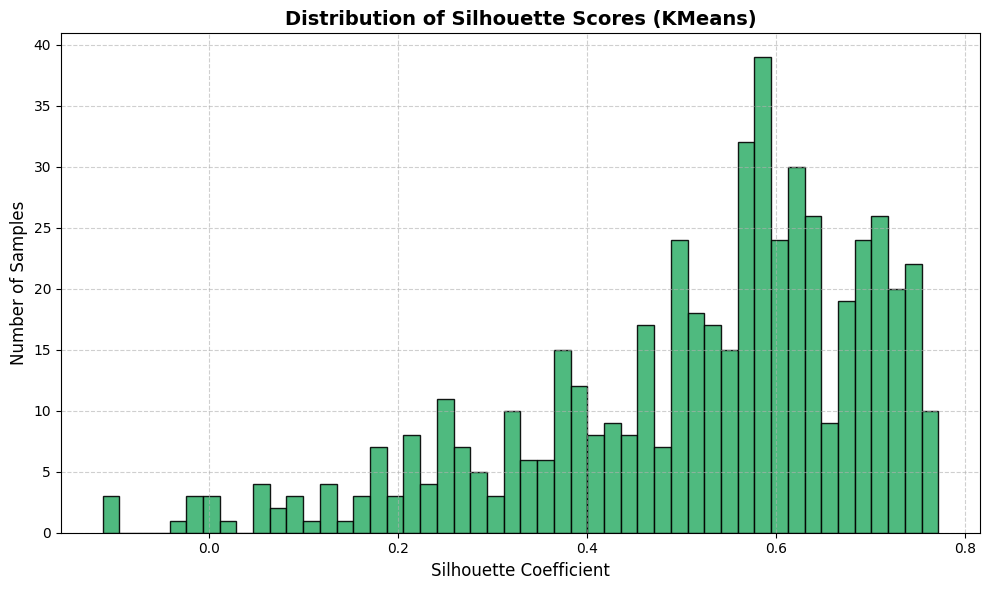

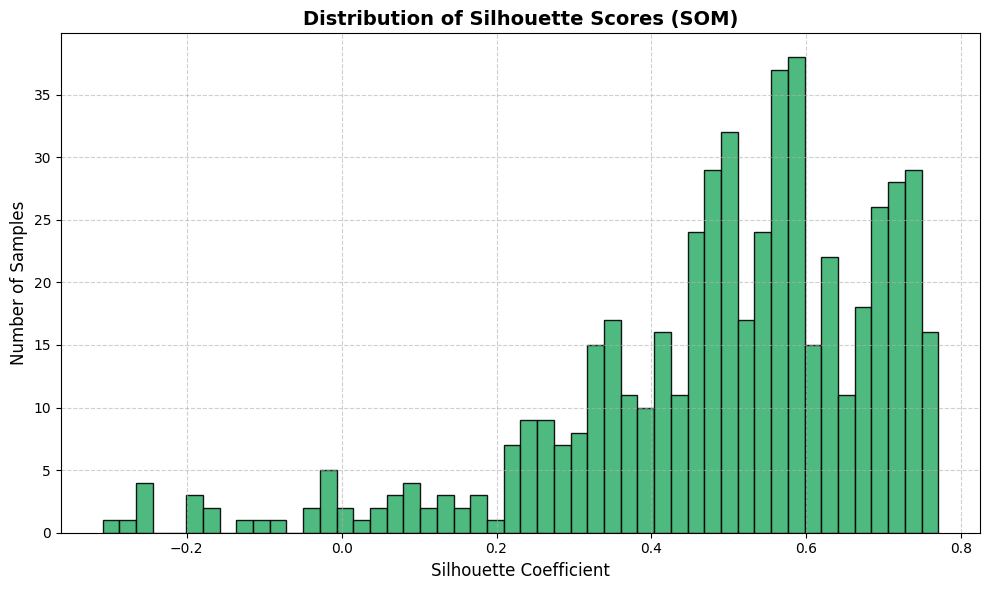

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

def plot_silhouette_distribution(data, labels, model_name="Model"):
    """
    Plots a histogram of Silhouette Coefficients for clustering models.

    Args:
        data (array-like): The original input data (not PCA-transformed).
        labels (array-like): Cluster labels from the model.
        model_name (str): Label to display in the plot title.
    """
    sample_scores = silhouette_samples(data, labels)

    plt.figure(figsize=(10, 6))
    plt.hist(sample_scores, bins=50, color='mediumseagreen', edgecolor='black', alpha=0.9)
    plt.title(f"Distribution of Silhouette Scores ({model_name})", fontsize=14, weight='bold')
    plt.xlabel("Silhouette Coefficient", fontsize=12)
    plt.ylabel("Number of Samples", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_silhouette_distribution(data, kmeans_labels, model_name="KMeans")
plot_silhouette_distribution(data, som_labels, model_name="SOM")


###4.4 davies bouldin score compare

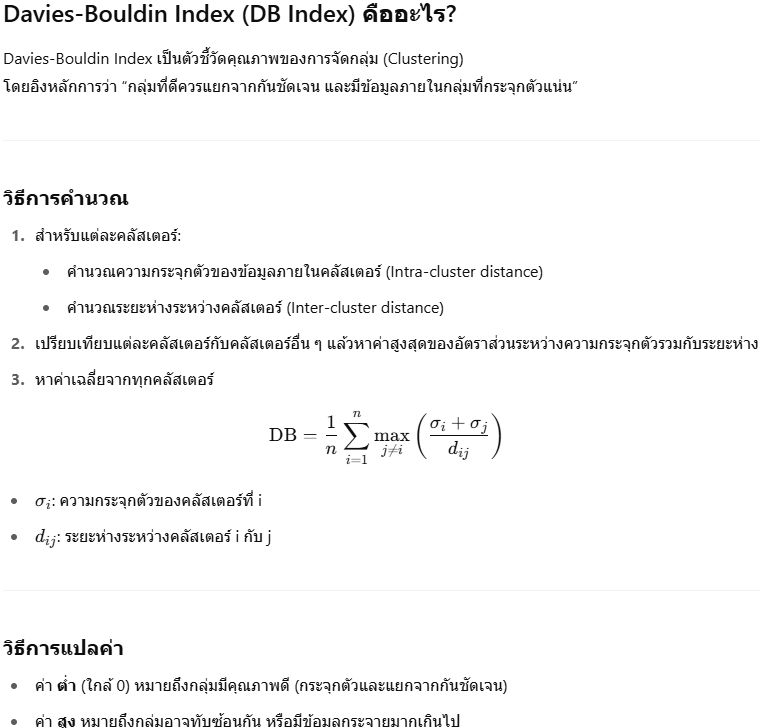

ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_kmeans = davies_bouldin_score(data, kmeans_labels)
db_som = davies_bouldin_score(data, som_labels)

print(f"KMeans DB Score: {db_kmeans:.4f}")
print(f"SOM DB Score: {db_som:.4f}")


KMeans DB Score: 0.8153
SOM DB Score: 0.8972
